<div><h1><center>Rapport de soutenance </div> </h1>

 AKMOUSSI Lydia <br>
 HADJ ARAB Feriel

# Présentation de la sae

Le processus d'admission dans les filières de réseaux et télécommunications est devenu de plus en plus compétitif avec le temps. Les établissements d'enseignement supérieur doivent évaluer un grand nombre de candidatures pour choisir les étudiants les mieux adaptés à leurs programmes. Dans ce contexte, l'analyse des données de Parcoursup offre une opportunité précieuse pour améliorer le processus de sélection et garantir une adéquation optimale entre les candidats et les programmes proposés.
Notre sae avait donc comme objectis de fournir un classement des condidats les plus aptes a réussir dans la formation, pour cela nous avons choisi certains modules jugés comme fondamentaux comme élements pris en compte dans le calcul de nos moyennes et dans la reussite futur des etudiants.




<h2 id="informations-sur-les-donnees">Informations sur les données</h2>

<ul>
        <li><a href="#informations-sur-les-donnees"><strong>Informations sur les données</strong></a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a> </li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale<a></li>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("RT_Anonyme.xlsx")


In [6]:
print("Nombre de voeux total :",len(df))
counts=df['Vœu confirmé - Libellé'].value_counts()
nombre_confirme=counts.get('Validée',0)
print("Nombre de voeux confirmés : ",nombre_confirme)
nombre_non_confirme=counts.get('Non validée',0)
print("Nombre de voeux non confirmés :",nombre_non_confirme)

print("Répartition :")
counts1=df["Série - Code"].value_counts()
nb_bac_generaux=counts1.get('Générale',0)
print("\t ",nb_bac_generaux,"bacs généraux")
counts1=df["Série - Code"].value_counts()
nb_bac_STI2D=counts1.get('STI2D',0)
print("\t ",nb_bac_STI2D,"bacs technologique")

Nombre de voeux total : 2520
Nombre de voeux confirmés :  2284
Nombre de voeux non confirmés : 236
Répartition :
	  1251 bacs généraux
	  705 bacs technologique


<h2 id="traitements-effectues-sur-les-donnees">Traitements éffectués sur les donnees</h2>

<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees"><strong>Traitements effectués sur les données</strong></a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a> </li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale<a></li>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>


#### Les étapes qui nous ont permis d'avoir des données plus clair : <br>

- Lecture du fichier Excel et chargement des données dans un DataFrame.<br>
- Filtrage des lignes où le statut du "Vœu confirmé" est "Non validée".<br>
- Remplacement des valeurs "Aucune note" par des valeurs nulles.<br>
- Suppression des lignes sans valeur pour le "Série - Code".<br>
- Conversion des colonnes de notes, moyennes et classements en entiers.<br>
- Suppression des colonnes vides restantes.<br>
- Option pour enregistrer les modifications dans un nouveau fichier Excel (actuellement commentée).<br>

Affichage du nombre total de lignes restantes dans le DataFrame.<br>


In [7]:

#code pour filtrer les données
# Lecture du fichier Excel
df2 = pd.read_excel('RT_Anonyme.xlsx')

# Supprimer les colonnes vides
df2 = df2.dropna(axis=1, how='all')

# Supprimer les lignes où la valeur de la colonne "Vœu confirmé - Libellé" est "non confirmé"
df2 = df2[df2['Vœu confirmé - Libellé'] != 'Non validée']

# Remplacer les valeurs "Aucune note" par des valeurs nulles dans toutes les colonnes
df2 = df2.replace('Aucune note', pd.NA)

# Supprimer les lignes qui n'ont pas de valeur pour la colonne "Serie Code"
df2 = df2.dropna(subset=['Série - Code'])

# Convertir les colonnes commençant par "note" et "moyenne" en type int
cols_to_convert = [col for col in df2.columns if col.startswith('Note') or col.startswith('Moyenne') or col.startswith('Classement')]
df2[cols_to_convert] = df2[cols_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Supprimer les colonnes vides
df2 = df2.dropna(axis=1, how='all')
# Enregistrer le DataFrame modifié dans un nouveau fichier Excel
'''df2.to_excel('RT_Anonyme_Modifié.xlsx', index=False)'''


print("Le nombre total de lignes devient  :", len(df2))



Le nombre total de lignes devient  : 1837



<h2 id="Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</h2>

<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations"><strong>Choix des départements mis en avant dans nos visualisations</strong></a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a> </li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale<a></li>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>


Les départements mis en avant dans nos corrélations sont ceux d'où proviennent les candidats ayant le plus postulé et ce sont : 77-93-94

Nous avons choisis les départements du 77-93-94 car les etudiants ayant le plus postulés proviennent de ces départements.

Nombre de condidats issus de chaque départements:<br>
* Départements du 93 : 707  <br>
* Départements du 92 : 174  <br>
* Départements du 91 : 97  <br>
* Départements du 75 : 258  <br>
* Départements du 95 : 425  <br>
* Départements du 77 : 105  <br>
* Départements du 87 : 116  <br>
 


In [8]:

#ce code nous permet de calculer le nombre d'etudiants ayant postulés pour chaque départements

import re
import numpy as np

def count_postal_code(df, department):
    nb = 0  # Initialisation du compteur
    pattern = rf'^{department}[0-9]{{3}}$'  # Expression régulière pour les codes postaux commençant par le département spécifié

    for i in df['Commune Etablissement origine - CodePostal 2022/2023']:
        if isinstance(i, (int, float)) and not np.isnan(i):
            i = str(int(i))  # Convertir le nombre entier en chaîne de caractères
        if re.match(pattern, str(i)) :
            nb += 1

    return nb

# Exemple d'utilisation de la fonction avec le département 76
department_count = count_postal_code(df, '75')
print("Le nombre d'etudiants  dans le departemnt 75 est :", department_count)

Le nombre d'etudiants  dans le departemnt 75 est : 258


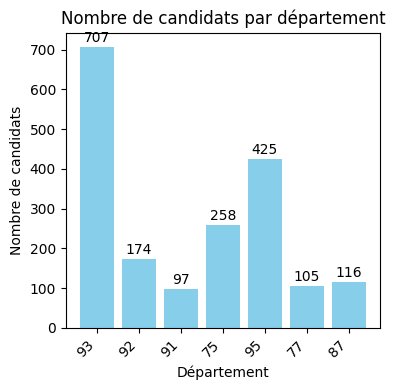

In [9]:


# Données des départements et du nombre de candidats
departements = ['93', '92', '91', '75', '95', '77', '87']
candidats = [707, 174, 97, 258, 425, 105, 116]

# Création du diagramme à barres
plt.figure(figsize=(4, 4))
plt.bar(departements, candidats, color='skyblue')

# Ajout de titres et de libellés
plt.title('Nombre de candidats par département')
plt.xlabel('Département')
plt.ylabel('Nombre de candidats')

# Affichage des valeurs au-dessus des barres
for i in range(len(departements)):
    plt.text(i, candidats[i] + 5, str(candidats[i]), ha='center', va='bottom')

# Affichage du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<h2 id="Répartition-des-candidats">Répartitions des candidats par type de bac</h2>
<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats"><strong>Répartition des candidats</strong></a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a> </li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale<a></li>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>

In [10]:
print("Répartition :")
counts1 = df["Série - Code"].value_counts()
nb_bac_generaux = counts1.get('Générale', 0)
nb_bac_STI2D = counts1.get('STI2D', 0)

print("\t ", nb_bac_generaux, "bacs généraux")
print("\t ", nb_bac_STI2D, "bacs technologique")


Répartition :
	  1251 bacs généraux
	  705 bacs technologique


<h2 id="#Statistiques-sur-les-données">Statistiques sur les données</h2>
<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données"><strong>Statistiques sur les données</strong></a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a></li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale<a></li>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>


### Représentation statistiques sur les bacs géneraux

Dans les départements 95-93-75 + (Bacs généraux) + (Bacheliers anterieurs) = 146


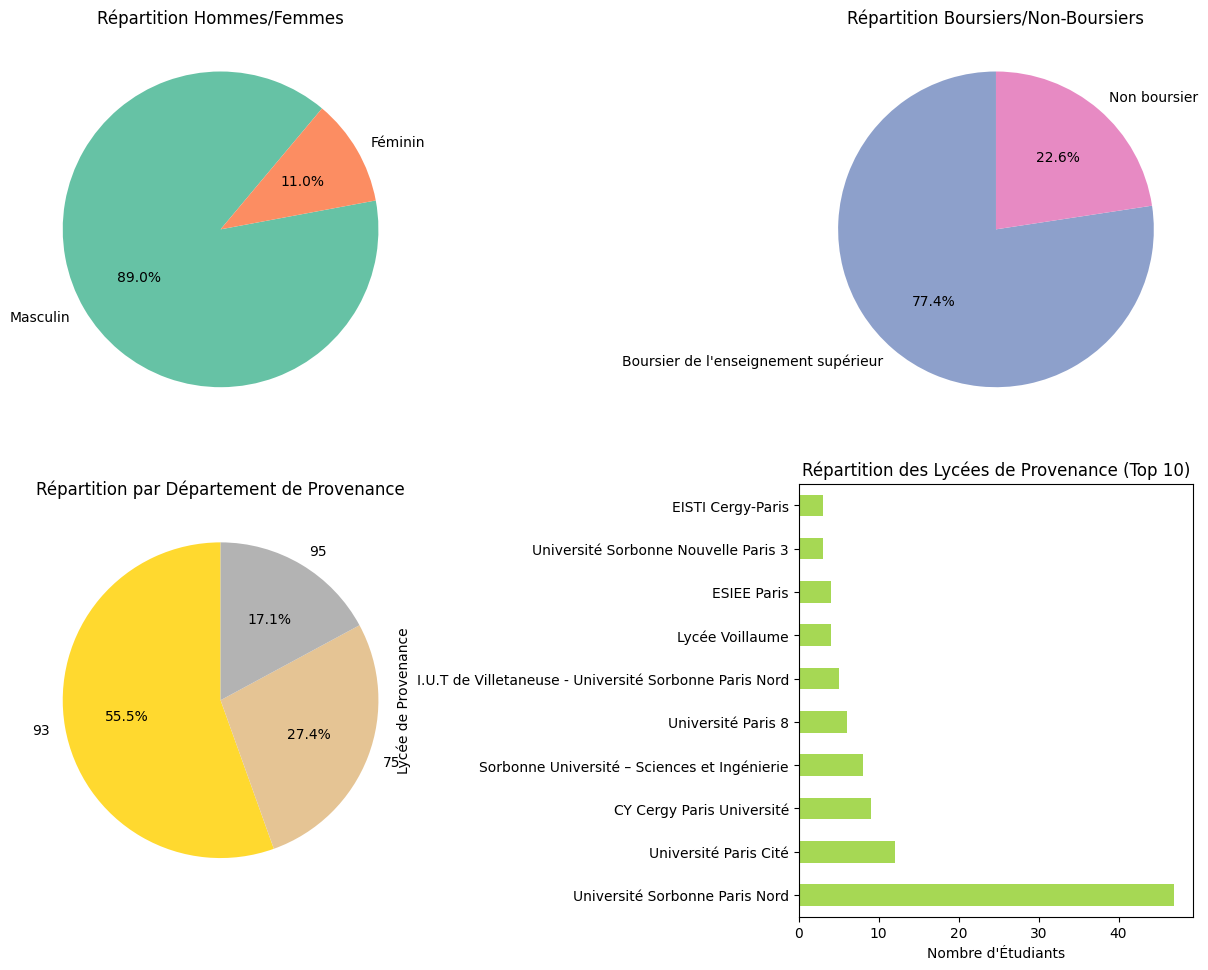

In [11]:
 

def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'Générale') &  
        (df2['Type Formation - Libellé  2022/2023'] != 'Terminale')
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3']  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_lycee_distribution(filtered_df2, ax):
    lycée_distribution = filtered_df2['Nom Etablissement origine 2022/2023'].value_counts().head(10)
    lycée_distribution.plot(kind='barh', color='#a6d854', ax=ax)  # Utilisation de barh pour un graphique horizontal, couleur vert pastel
    ax.set_title("Répartition des Lycées de Provenance (Top 10)")
    ax.set_ylabel("Lycée de Provenance")
    ax.set_xlabel("Nombre d'Étudiants")


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3']  # Jaune pastel, beige pastel, gris pastel
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Dans les départements 95-93-75 + (Bacs généraux) + (Bacheliers anterieurs) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0, 0])
plot_bourse_distribution(filtered_df2, ax=axes[0, 1])
plot_departement_distribution(filtered_df2, ax=axes[1, 0])
plot_lycee_distribution(filtered_df2, ax=axes[1, 1])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Dans les départements 75-93-95 (Bacs généraux) : 676


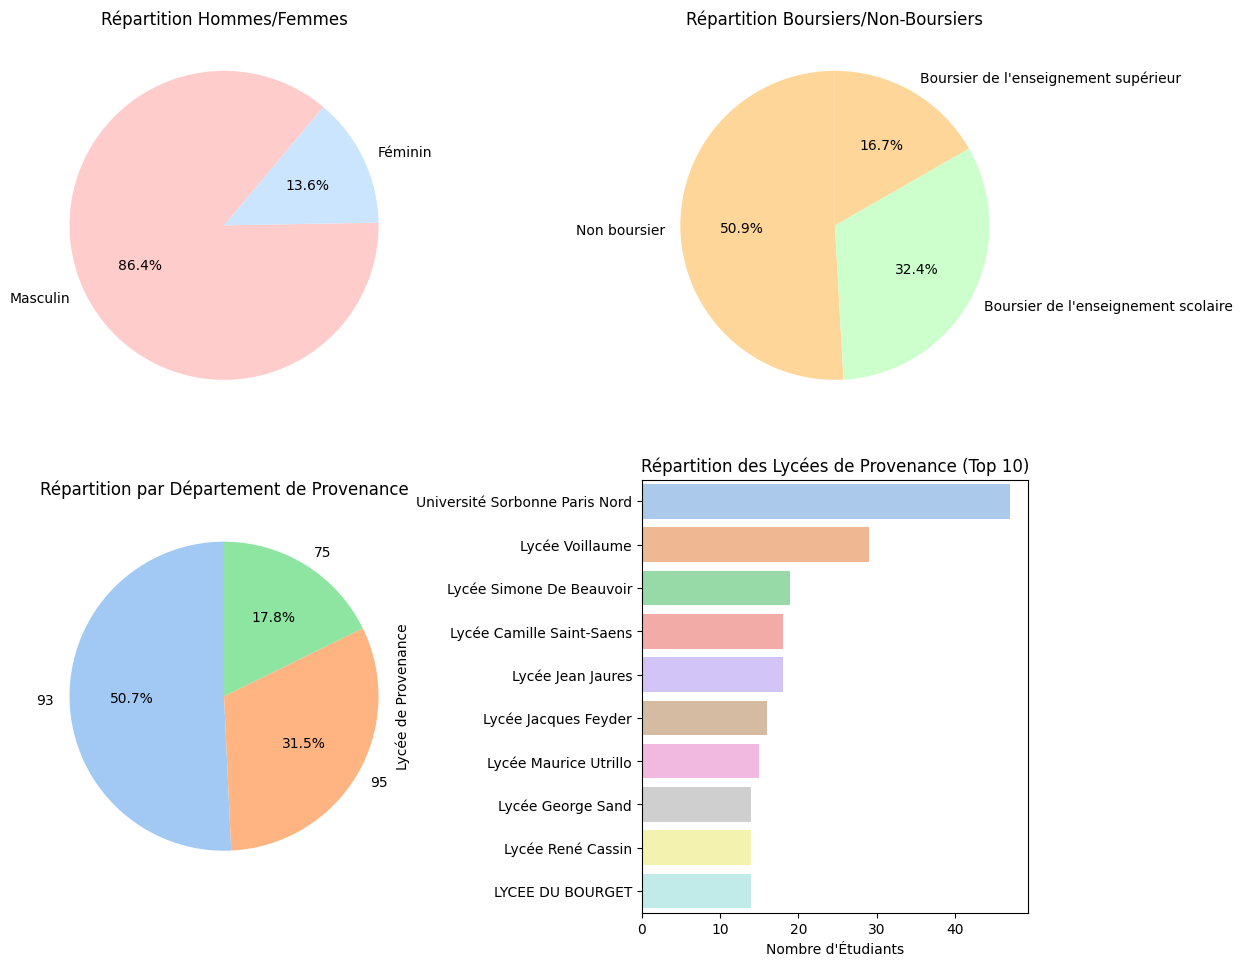

In [12]:
 
import seaborn as sns
import warnings

# Ignorer les avertissements de la catégorie FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

def count_students_matching_conditions(df2):
    condition = (
        (df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'Générale')
    )
    
    filtered_df2 = df2.loc[condition].copy()
    count = len(filtered_df2)

    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax):
    gender_distribution = filtered_df2['Sexe'].value_counts()
    colors = ['#FFCCCC', '#CCE5FF']  # Couleurs douces
    ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")

def plot_bourse_distribution(filtered_df2, ax):
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()
    colors = ['#FFD699', '#CCFFCC']  # Couleurs douces
    ax.pie(bourse_distribution, labels=bourse_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")

def plot_departement_distribution(filtered_df2, ax):
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()
    colors = sns.color_palette("pastel", len(departement_distribution))  # Utilisation de la palette pastel
    ax.pie(departement_distribution, labels=departement_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")


def plot_lycee_distribution(filtered_df2, ax):
    lycée_distribution = filtered_df2['Nom Etablissement origine 2022/2023'].value_counts().head(10)
    sns.barplot(x=lycée_distribution.values, y=lycée_distribution.index, ax=ax, palette="pastel")
    ax.set_title("Répartition des Lycées de Provenance (Top 10)")
    ax.set_xlabel("Nombre d'Étudiants")
    ax.set_ylabel("Lycée de Provenance")

def count_and_plot(df2):
    filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
    print("Dans les départements 75-93-95 (Bacs généraux) :", nombre_etudiants)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Réduction de la taille de la figure

    plot_gender_distribution(filtered_df2, axes[0, 0])
    plot_bourse_distribution(filtered_df2, axes[0, 1])
    plot_departement_distribution(filtered_df2, axes[1, 0])
    plot_lycee_distribution(filtered_df2, axes[1, 1])

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation de la fonction
count_and_plot(df2)


Dans les départements 95-93-75 + (Bacs généraux) + (Bacheliers antérieurs) = 530


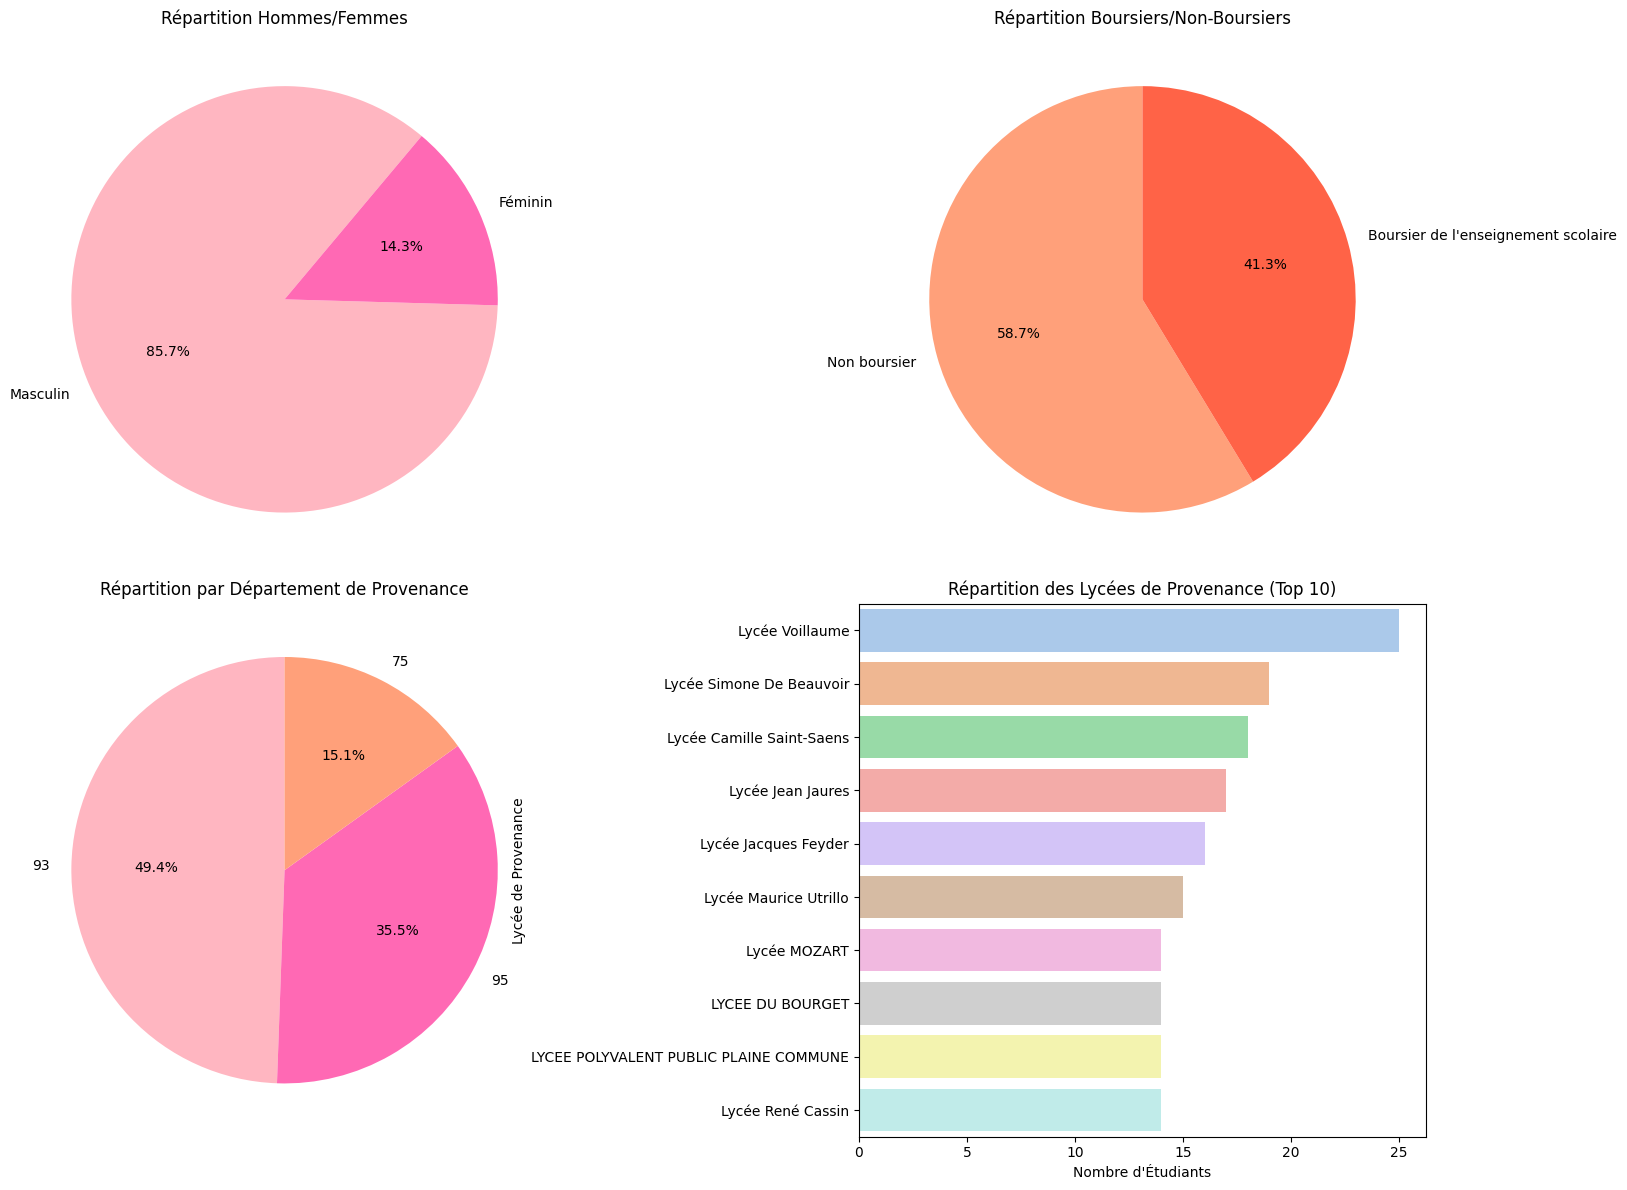

In [13]:
 

# Ignorer les avertissements de la catégorie FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'Générale') &  
        (df2['Type Formation - Libellé  2022/2023'] == 'Terminale')
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax):
    # Répartition Hommes/Femmes avec des couleurs rose et orange
    colors = ['#FFB6C1', '#FF69B4']  # Rose pour les femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()
    ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")

def plot_bourse_distribution(filtered_df2, ax):
    # Répartition Boursiers/Non-Boursiers avec des couleurs rose et orange
    colors = ['#FFA07A', '#FF6347']  # Orange pour les boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()
    ax.pie(bourse_distribution, labels=bourse_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")

def plot_lycee_distribution(filtered_df2, ax):
    lycée_distribution = filtered_df2['Nom Etablissement origine 2022/2023'].value_counts().head(10)
    sns.barplot(x=lycée_distribution.values, y=lycée_distribution.index, ax=ax, palette="pastel")
    ax.set_title("Répartition des Lycées de Provenance (Top 10)")
    ax.set_xlabel("Nombre d'Étudiants")
    ax.set_ylabel("Lycée de Provenance")

def plot_departement_distribution(filtered_df2, ax):
    # Répartition par Département de Provenance avec des couleurs rose et orange
    colors = ['#FFB6C1', '#FF69B4', '#FFA07A']  # Utilisation de différentes nuances de rose et orange
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()
    ax.pie(departement_distribution, labels=departement_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Dans les départements 95-93-75 + (Bacs généraux) + (Bacheliers antérieurs) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, axes[0, 0])
plot_bourse_distribution(filtered_df2, axes[0, 1])
plot_departement_distribution(filtered_df2, axes[1, 0])
plot_lycee_distribution(filtered_df2, axes[1, 1])


# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


### Représentation statistiques sur les bacs téchnologiques

Dans l'académie 75-93-95 + (Bacs technologiques) + (Bacheliers antérieurs) : 47


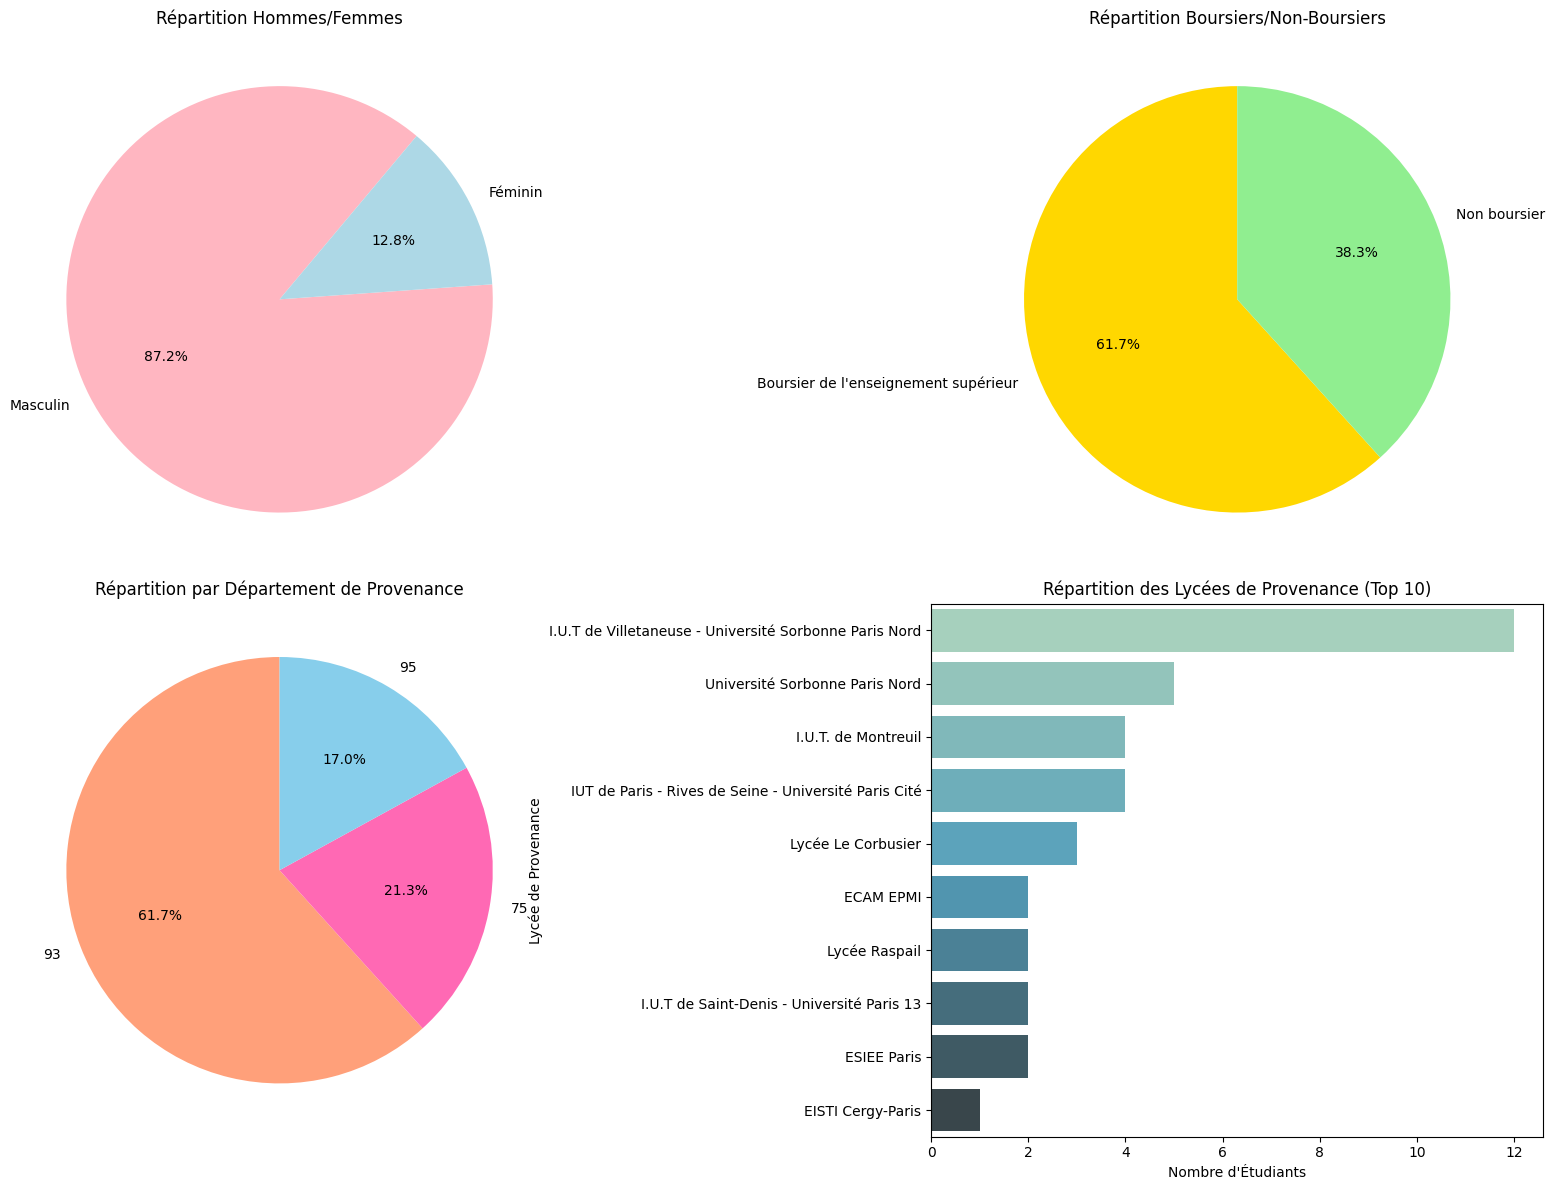

In [14]:
 

# Ignorer les avertissements de la catégorie FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

def count_students_matching_conditions(df2):
    condition = (
        (df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'STI2D') &
        (df2['Type Formation - Libellé  2022/2023'] != 'Terminale')
    )

    
    filtered_df = df2.loc[condition].copy()
    count = len(filtered_df)

    filtered_df['Département de Provenance'] = filtered_df['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df, count

def plot_gender_distribution(filtered_df, ax):
    gender_distribution = filtered_df['Sexe'].value_counts()
    colors = ['#FFB6C1', '#ADD8E6']  # Rose et Bleu clair
    ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")

def plot_bourse_distribution(filtered_df, ax):
    bourse_distribution = filtered_df['Candidat boursier - Libellé'].value_counts()
    colors = ['#FFD700', '#90EE90']  # Or et Vert clair
    ax.pie(bourse_distribution, labels=bourse_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")

def plot_departement_distribution(filtered_df, ax):
    departement_distribution = filtered_df['Département de Provenance'].value_counts()
    colors = ['#FFA07A', '#FF69B4', '#87CEEB']  # Saumon, Rose et Bleu clair
    ax.pie(departement_distribution, labels=departement_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")

def plot_lycee_distribution(filtered_df, ax):
    lycée_distribution = filtered_df['Nom Etablissement origine 2022/2023'].value_counts().head(10)
    sns.barplot(x=lycée_distribution.values, y=lycée_distribution.index, ax=ax, palette="GnBu_d")
    ax.set_title("Répartition des Lycées de Provenance (Top 10)")
    ax.set_xlabel("Nombre d'Étudiants")
    ax.set_ylabel("Lycée de Provenance")

def count_and_plot(df2):
    filtered_df, nombre_etudiants = count_students_matching_conditions(df2)
    print("Dans l'académie 75-93-95 + (Bacs technologiques) + (Bacheliers antérieurs) :", nombre_etudiants)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    plot_gender_distribution(filtered_df, axes[0, 0])
    plot_bourse_distribution(filtered_df, axes[0, 1])
    plot_departement_distribution(filtered_df, axes[1, 0])
    plot_lycee_distribution(filtered_df, axes[1, 1])

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation de la fonction
count_and_plot(df2)


Dans les départements 75-93-95 + (Bacs technologiques STI2D) = 396


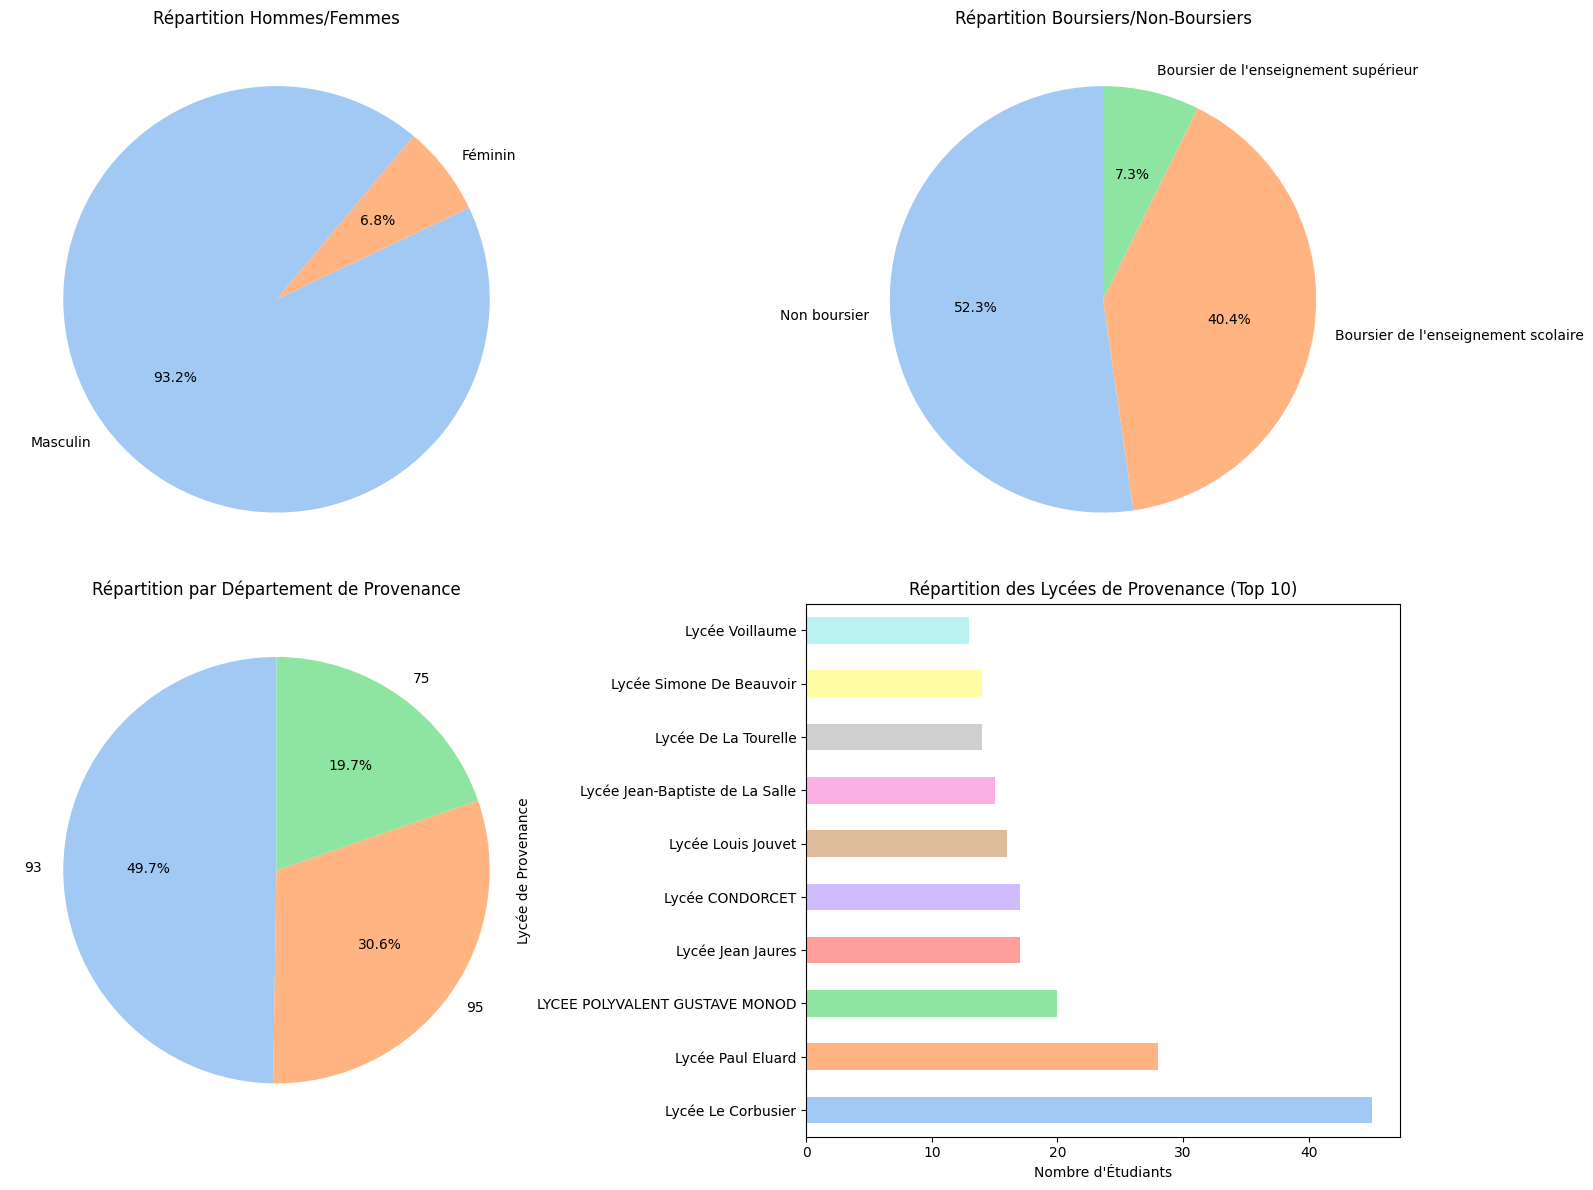

In [15]:
 

def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'STI2D')
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df['Département de Provenance'] = filtered_df['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df, count

def plot_student_distribution(filtered_df):
    # Créer une figure pour les sous-graphiques
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    # Sous-graphique 1: Répartition Hommes/Femmes
    gender_distribution = filtered_df['Sexe'].value_counts()
    axs[0, 0].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=50, colors=sns.color_palette("pastel"))
    axs[0, 0].set_title("Répartition Hommes/Femmes")

    # Sous-graphique 2: Répartition Boursiers/Non-Boursiers
    bourse_distribution = filtered_df['Candidat boursier - Libellé'].value_counts()
    axs[0, 1].pie(bourse_distribution, labels=bourse_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axs[0, 1].set_title("Répartition Boursiers/Non-Boursiers")

    # Sous-graphique 3: Répartition par Département de Provenance
    departement_distribution = filtered_df['Département de Provenance'].value_counts()
    axs[1, 0].pie(departement_distribution, labels=departement_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axs[1, 0].set_title("Répartition par Département de Provenance")

    # Sous-graphique 4: Répartition des Lycées de Provenance
    lycée_distribution = filtered_df["Nom Etablissement origine 2022/2023"].value_counts().head(10)
    lycée_distribution.plot(kind='barh', color=sns.color_palette("pastel"), ax=axs[1, 1])
    axs[1, 1].set_title("Répartition des Lycées de Provenance (Top 10)")
    axs[1, 1].set_xlabel("Nombre d'Étudiants")
    axs[1, 1].set_ylabel("Lycée de Provenance")

    # Afficher la figure
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation des fonctions
filtered_df, nombre_etudiants = count_students_matching_conditions(df2)
print("Dans les départements 75-93-95 + (Bacs technologiques STI2D) =", nombre_etudiants)
plot_student_distribution(filtered_df)


Dans les départements 95-93-75+(Bacs téchnologiques)+(Primo entrants): 349


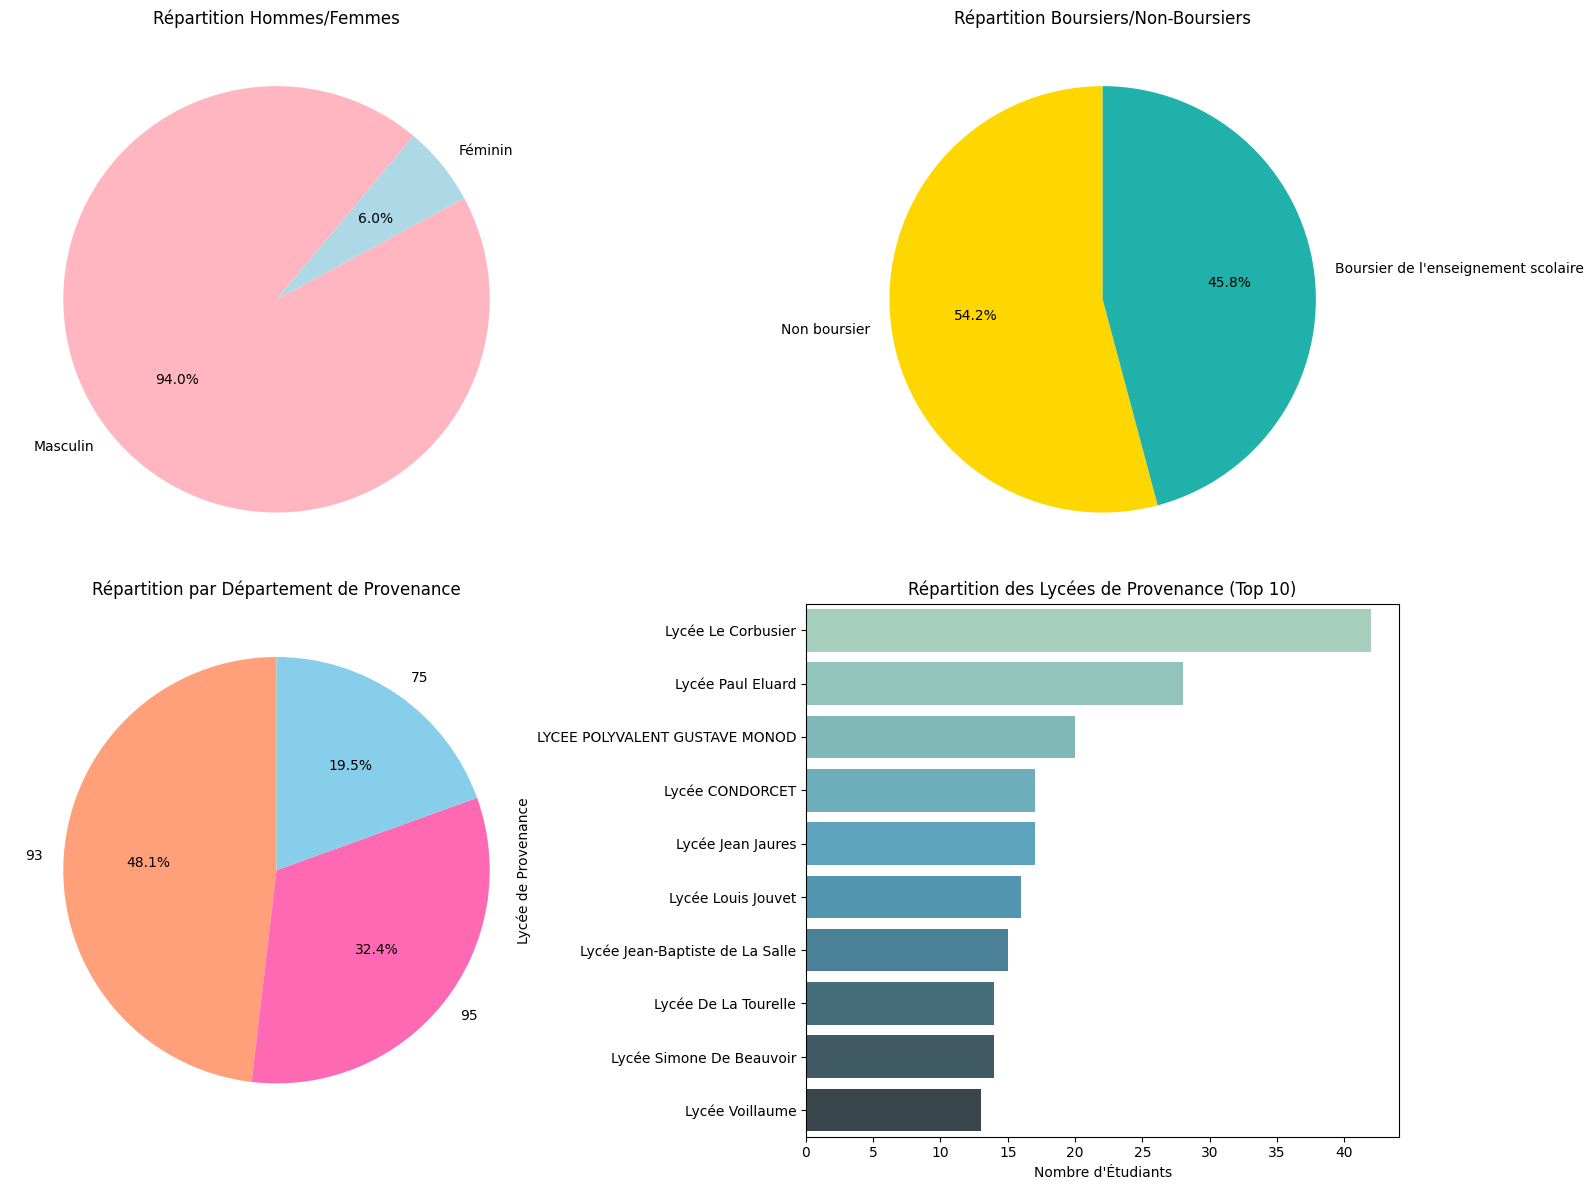

In [16]:
 

# Ignorer les avertissements de la catégorie FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

def count_students_matching_conditions(df2):
    condition = (
        (df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'STI2D') &
        (df2['Type Formation - Libellé  2022/2023'] == 'Terminale')
    )
    
    filtered_df = df2.loc[condition].copy()
    count = len(filtered_df)

    filtered_df['Département de Provenance'] = filtered_df['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df, count

def plot_gender_distribution(filtered_df, ax):
    gender_distribution = filtered_df['Sexe'].value_counts()
    colors = ['#FFB6C1', '#ADD8E6']  # Rose et Bleu clair
    ax.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")

def plot_bourse_distribution(filtered_df, ax):
    bourse_distribution = filtered_df['Candidat boursier - Libellé'].value_counts()
    colors = ['#FFD700', '#20B2AA']  # Or et Vert turquoise
    ax.pie(bourse_distribution, labels=bourse_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")

def plot_departement_distribution(filtered_df, ax):
    departement_distribution = filtered_df['Département de Provenance'].value_counts()
    colors = ['#FFA07A', '#FF69B4', '#87CEEB']  # Saumon, Rose et Bleu clair
    ax.pie(departement_distribution, labels=departement_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")

def plot_lycee_distribution(filtered_df, ax):
    lycée_distribution = filtered_df['Nom Etablissement origine 2022/2023'].value_counts().head(10)
    sns.barplot(x=lycée_distribution.values, y=lycée_distribution.index, ax=ax, palette="GnBu_d")
    ax.set_title("Répartition des Lycées de Provenance (Top 10)")
    ax.set_xlabel("Nombre d'Étudiants")
    ax.set_ylabel("Lycée de Provenance")

def count_and_plot(df2):
    filtered_df, nombre_etudiants = count_students_matching_conditions(df2)
    print("Dans les départements 95-93-75+(Bacs téchnologiques)+(Primo entrants):", nombre_etudiants)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    plot_gender_distribution(filtered_df, axes[0, 0])
    plot_bourse_distribution(filtered_df, axes[0, 1])
    plot_departement_distribution(filtered_df, axes[1, 0])
    plot_lycee_distribution(filtered_df, axes[1, 1])

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation de la fonction
count_and_plot(df2)


Hors les départements du 95-93-75 + (Bacs généraux) + (Bacheliers anterieurs) = 82


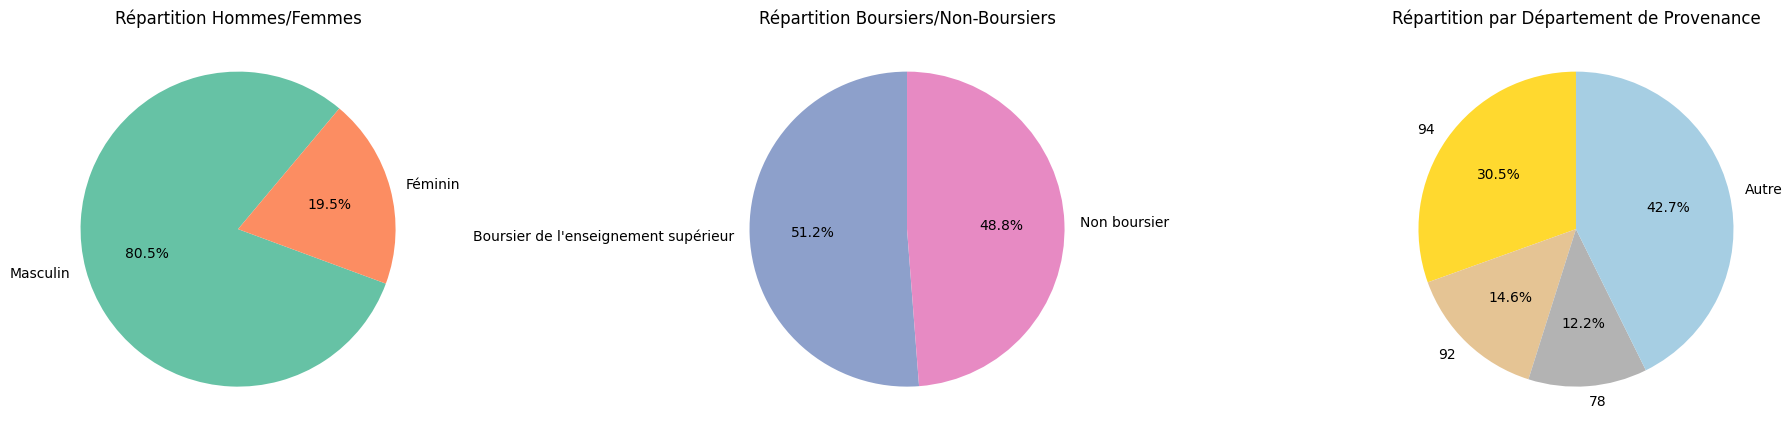

In [17]:
 
def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'Générale') &  
        (df2['Type Formation - Libellé  2022/2023'] != 'Terminale')&
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].isnull()) 
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3']  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer une copie du DataFrame filtré sans les valeurs NaN dans la colonne 'Département de Provenance'
    filtered_df2_no_na = filtered_df2.dropna(subset=['Département de Provenance']).copy()

    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2_no_na['Département de Provenance'].value_counts()

    # Exclure les départements '75', '93', '95'
    departement_distribution = departement_distribution[~departement_distribution.index.isin(['75', '93', '95'])]

    # Regrouper les autres départements sous la catégorie 'Autre'
    threshold = 10  # Limite pour regrouper les départements moins représentés
    other_departments_count = departement_distribution[departement_distribution < threshold].sum()
    departement_distribution = departement_distribution[departement_distribution >= threshold]
    departement_distribution['Autre'] = other_departments_count

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
    # Jaune pastel, beige pastel, gris pastel, autres couleurs pour les autres départements
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y




# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Hors les départements du 95-93-75 + (Bacs généraux) + (Bacheliers anterieurs) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques avec une seule ligne et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0])
plot_bourse_distribution(filtered_df2, ax=axes[1])
plot_departement_distribution(filtered_df2, ax=axes[2])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Hors les départements du 95-93-75 + (Bacs généraux) + (Indifférement de l'année d'obtention du bac) = 469


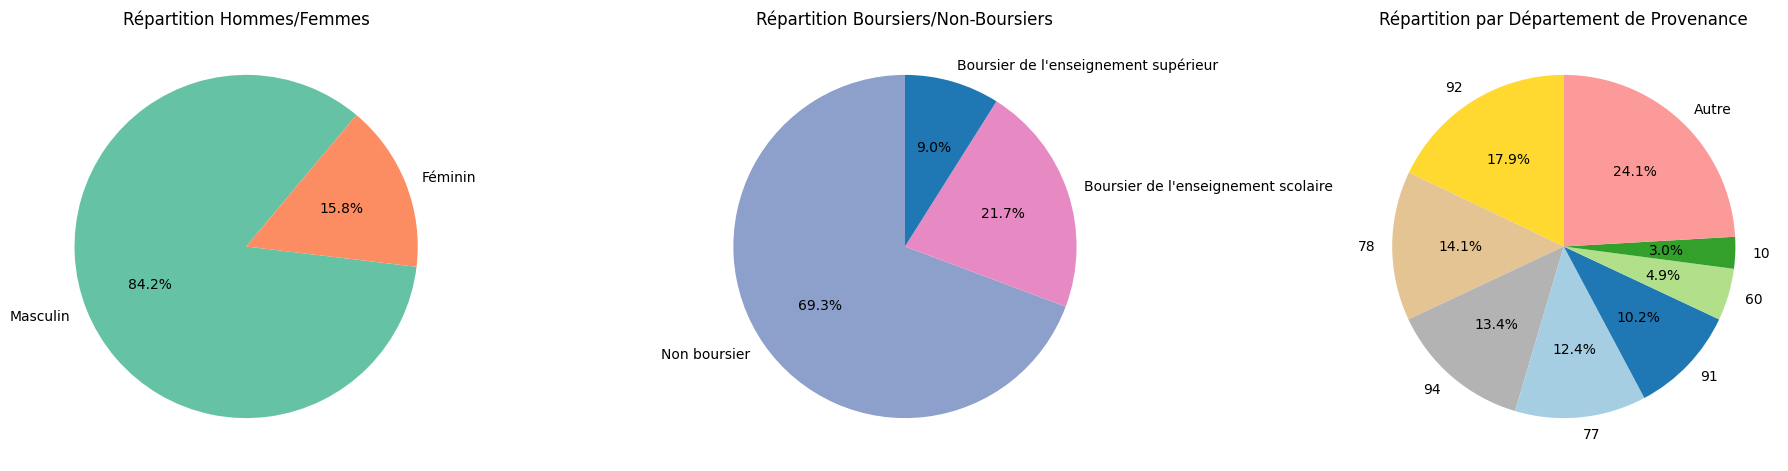

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'Générale')&
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].isnull()) 

    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3',"#1f78b4"]  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()

    # Exclure les départements '75', '93', '95'
    departement_distribution = departement_distribution[~departement_distribution.index.isin(['75', '93', '95'])]

    # Regrouper les autres départements sous la catégorie 'Autre'
    threshold = 10  # Limite pour regrouper les départements moins représentés
    other_departments_count = departement_distribution[departement_distribution < threshold].sum()
    departement_distribution = departement_distribution[departement_distribution >= threshold]
    departement_distribution['Autre'] = other_departments_count

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
    # Jaune pastel, beige pastel, gris pastel, autres couleurs pour les autres départements
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Hors les départements du 95-93-75 + (Bacs généraux) + (Indifférement de l'année d'obtention du bac) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques avec une seule ligne et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0])
plot_bourse_distribution(filtered_df2, ax=axes[1])
plot_departement_distribution(filtered_df2, ax=axes[2])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Hors départements du 95-93-75 + (Bacs généraux) + (Primo entrants) = 387


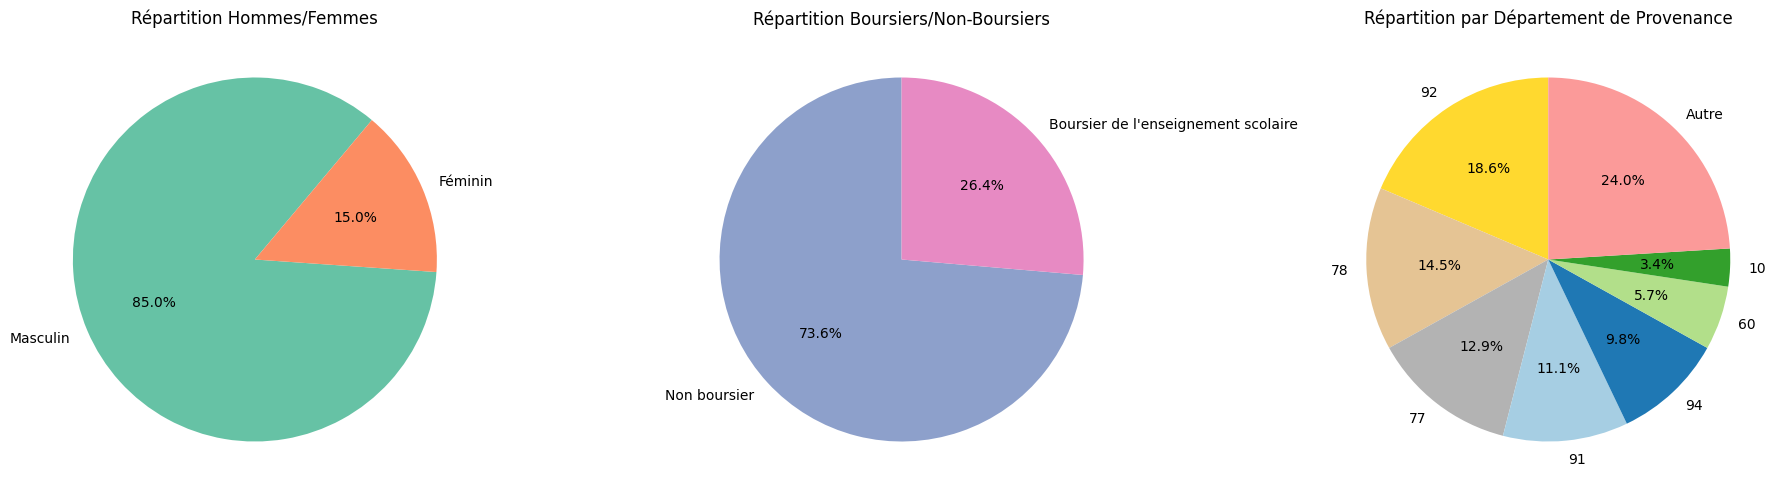

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'Générale') &  
        (df2['Type Formation - Libellé  2022/2023'] == 'Terminale')&
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].isnull()) 
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3']  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()

    # Exclure les départements '75', '93', '95'
    departement_distribution = departement_distribution[~departement_distribution.index.isin(['75', '93', '95'])]

    # Regrouper les autres départements sous la catégorie 'Autre'
    threshold = 10  # Limite pour regrouper les départements moins représentés
    other_departments_count = departement_distribution[departement_distribution < threshold].sum()
    departement_distribution = departement_distribution[departement_distribution >= threshold]
    departement_distribution['Autre'] = other_departments_count

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
    # Jaune pastel, beige pastel, gris pastel, autres couleurs pour les autres départements
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Hors départements du 95-93-75 + (Bacs généraux) + (Primo entrants) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques avec une seule ligne et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0])
plot_bourse_distribution(filtered_df2, ax=axes[1])
plot_departement_distribution(filtered_df2, ax=axes[2])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Hors les départements du 95-93-75 + (Bacs technologiques) + (Bacheliers anterieurs) = 35


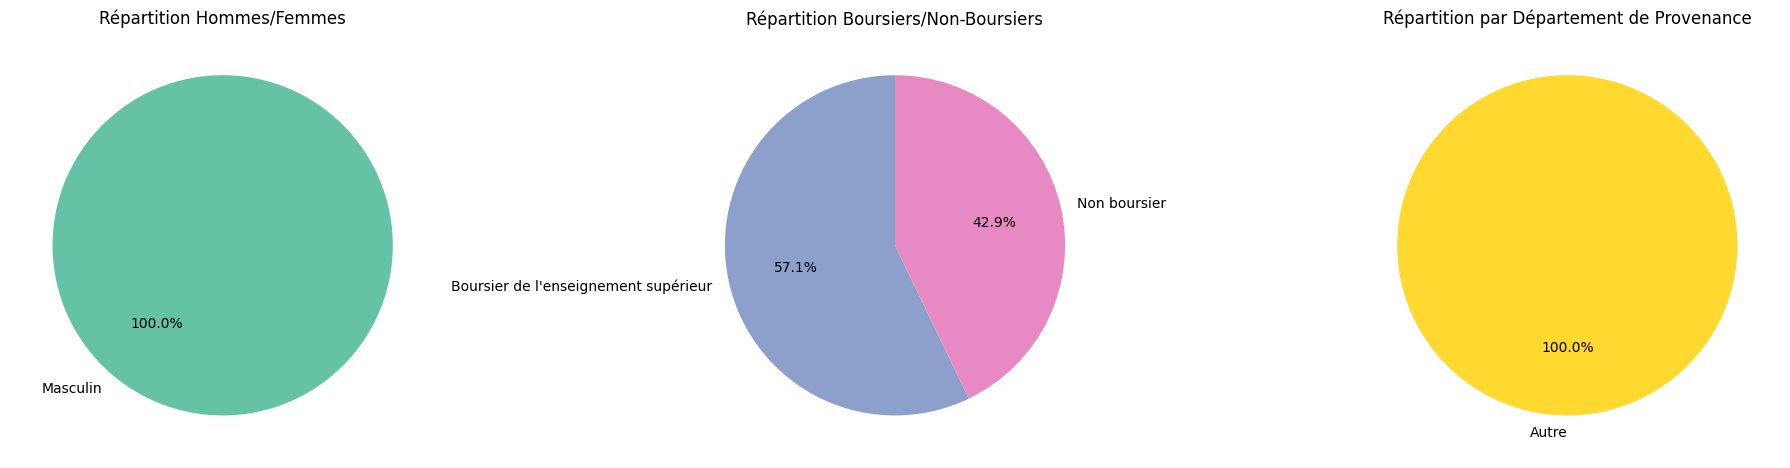

In [20]:
 

def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'STI2D') &  
        (df2['Type Formation - Libellé  2022/2023'] != 'Terminale')&
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].isnull()) 
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3']  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()

    # Exclure les départements '75', '93', '95'
    departement_distribution = departement_distribution[~departement_distribution.index.isin(['75', '93', '95'])]

    # Regrouper les autres départements sous la catégorie 'Autre'
    threshold = 10  # Limite pour regrouper les départements moins représentés
    other_departments_count = departement_distribution[departement_distribution < threshold].sum()
    departement_distribution = departement_distribution[departement_distribution >= threshold]
    departement_distribution['Autre'] = other_departments_count

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
    # Jaune pastel, beige pastel, gris pastel, autres couleurs pour les autres départements
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Hors les départements du 95-93-75 + (Bacs technologiques) + (Bacheliers anterieurs) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques avec une seule ligne et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0])
plot_bourse_distribution(filtered_df2, ax=axes[1])
plot_departement_distribution(filtered_df2, ax=axes[2])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Hors les départements du 95-93-75 + (technologiques) + (Indifférement de l'année d'obtention du bac) = 249


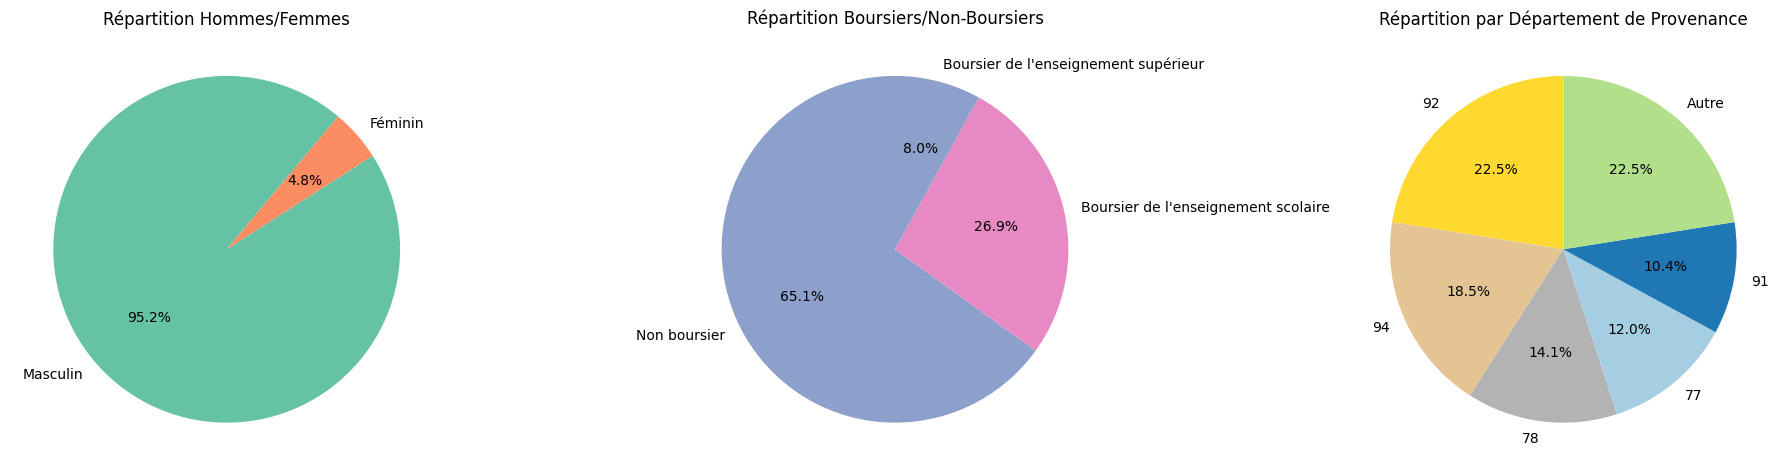

In [21]:
 
def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'STI2D')&
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].isnull()) 

    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3']  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()

    # Exclure les départements '75', '93', '95'
    departement_distribution = departement_distribution[~departement_distribution.index.isin(['75', '93', '95'])]

    # Regrouper les autres départements sous la catégorie 'Autre'
    threshold = 10  # Limite pour regrouper les départements moins représentés
    other_departments_count = departement_distribution[departement_distribution < threshold].sum()
    departement_distribution = departement_distribution[departement_distribution >= threshold]
    departement_distribution['Autre'] = other_departments_count

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
    # Jaune pastel, beige pastel, gris pastel, autres couleurs pour les autres départements
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Hors les départements du 95-93-75 + (technologiques) + (Indifférement de l'année d'obtention du bac) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques avec une seule ligne et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0])
plot_bourse_distribution(filtered_df2, ax=axes[1])
plot_departement_distribution(filtered_df2, ax=axes[2])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Hors départements du 95-93-75 + (technologiques) + (Primo entrants) = 214


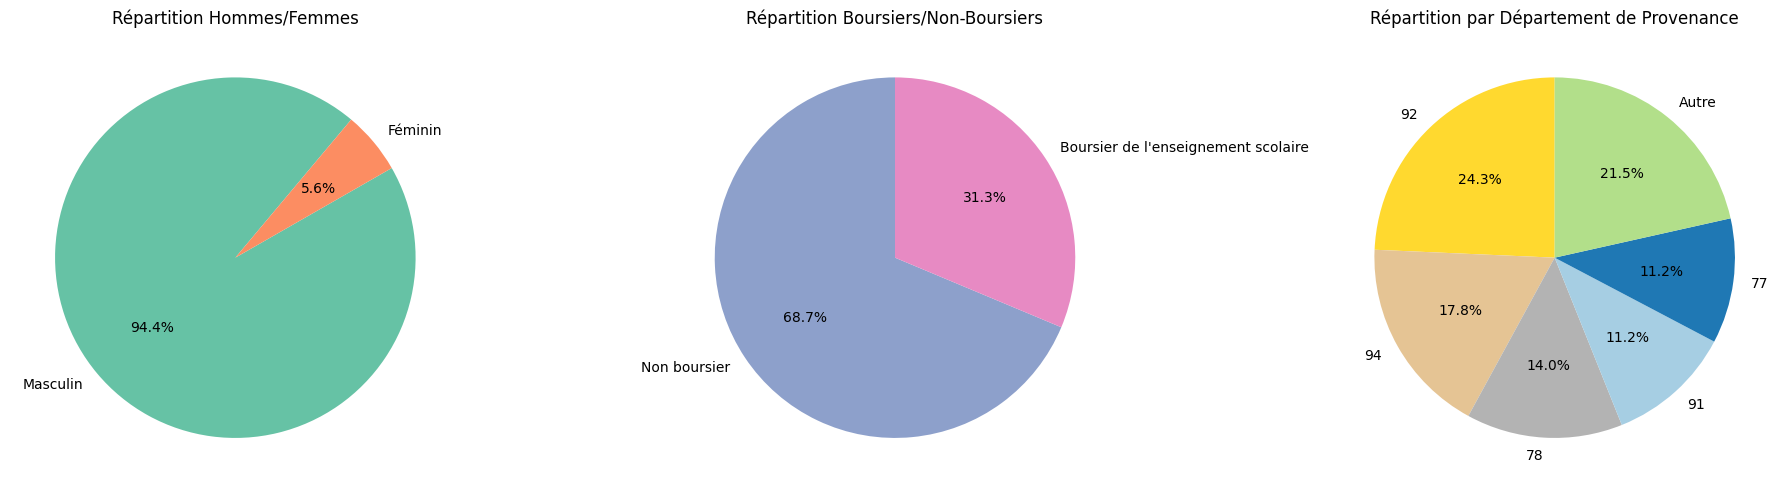

In [22]:
 

def count_students_matching_conditions(df2):
    # Filtrer les lignes qui satisfont toutes les conditions
    condition = (
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2].isin(['75', '93', '95'])) &
        (df2['Série - Code'] == 'STI2D') &  
        (df2['Type Formation - Libellé  2022/2023'] == 'Terminale')&
        (~df2['Commune Etablissement origine - CodePostal 2022/2023'].isnull()) 
    )

    # Sélectionner les lignes qui satisfont la condition en utilisant .loc
    filtered_df2 = df2.loc[condition].copy()

    # Compter le nombre d'étudiants dans le DataFrame filtré
    count = len(filtered_df2)

    # Extraire les deux premiers chiffres du code postal de l'établissement d'origine pour représenter le département de provenance
    filtered_df2['Département de Provenance'] = filtered_df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

    return filtered_df2, count

def plot_gender_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition hommes/femmes
    gender_distribution = filtered_df2['Sexe'].value_counts()

    # Répartition Hommes/Femmes avec des couleurs pastel
    colors = ['#66c2a5', '#fc8d62']  # Vert pastel pour les femmes, orange pastel pour les hommes
    gender_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=50, colors=colors)
    ax.set_title("Répartition Hommes/Femmes")
    ax.set_ylabel('')  # Supprimer l'étiquette y

def plot_bourse_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition boursiers/non-boursiers
    bourse_distribution = filtered_df2['Candidat boursier - Libellé'].value_counts()

    # Répartition Boursiers/Non-Boursiers avec des couleurs pastel
    colors = ['#8da0cb', '#e78ac3']  # Bleu pastel pour les boursiers, violet pastel pour les non-boursiers
    bourse_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition Boursiers/Non-Boursiers")
    ax.set_ylabel('')  # Supprimer l'étiquette y


def plot_departement_distribution(filtered_df2, ax=None):
    # Créer un graphique pie chart pour la répartition par Département de Provenance
    departement_distribution = filtered_df2['Département de Provenance'].value_counts()

    # Exclure les départements '75', '93', '95'
    departement_distribution = departement_distribution[~departement_distribution.index.isin(['75', '93', '95'])]

    # Regrouper les autres départements sous la catégorie 'Autre'
    threshold = 10  # Limite pour regrouper les départements moins représentés
    other_departments_count = departement_distribution[departement_distribution < threshold].sum()
    departement_distribution = departement_distribution[departement_distribution >= threshold]
    departement_distribution['Autre'] = other_departments_count

    # Répartition par Département de Provenance avec des couleurs pastel
    colors = ['#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']
    # Jaune pastel, beige pastel, gris pastel, autres couleurs pour les autres départements
    departement_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title("Répartition par Département de Provenance")
    ax.set_ylabel('')  # Supprimer l'étiquette y

# Exemple d'utilisation des fonctions
filtered_df2, nombre_etudiants = count_students_matching_conditions(df2)
print("Hors départements du 95-93-75 + (technologiques) + (Primo entrants) =", nombre_etudiants)

# Créer une figure pour les sous-graphiques avec une seule ligne et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler les fonctions de tracé pour chaque sous-graphique
plot_gender_distribution(filtered_df2, ax=axes[0])
plot_bourse_distribution(filtered_df2, ax=axes[1])
plot_departement_distribution(filtered_df2, ax=axes[2])

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


<h2 id="différentes-corrélations">Les différentes corrélations</h2>
<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations"><strong>Les différentes corrélations</strong></a></li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale</a>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>

##### <span style="color:orange"><strong>Corrélation entre les étudiants boursiers et la répartition départementale</strong></span>

Dans le cadre d'une étude sur l'accessibilité à l'éducation supérieure et la distribution des ressources financières, une analyse de corrélation est entreprise pour comprendre la relation entre le nombre d'étudiants bénéficiaires de bourses dans le département 93 et l'effectif total des étudiants dans cette région.

Une observation significative réside dans le fait que la plupart des étudiants originaires du département 93 bénéficient de bourses. Cette tendance pourrait être attribuée au statut socio-économique relativement modeste du département, qui figure parmi les zones les moins favorisées de France

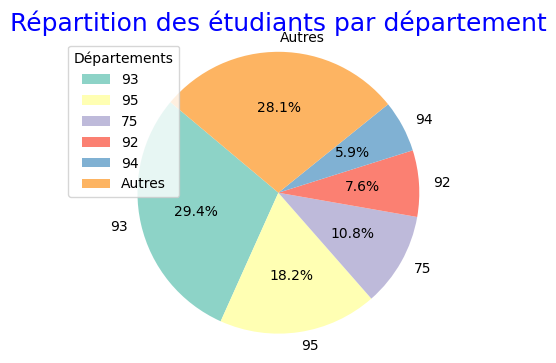

In [30]:
 


# Extraire les codes de département à partir des codes postaux
df2['Departement'] = df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str[:2]

# Compter le nombre d'étudiants par département
department_counts = df2['Departement'].value_counts()

# Sélectionner les 5 départements les plus représentés
top_departments = department_counts.head(5)

# Calculer le nombre total d'étudiants dans les départements les plus représentés
total_students_top_departments = top_departments.sum()

# Créer un DataFrame pour les départements les moins représentés
other_departments = pd.Series([department_counts[~department_counts.index.isin(top_departments.index)].sum()], index=['Autres'])

# Combiner les départements les plus représentés et la catégorie "Autres"
combined_departments = pd.concat([top_departments, other_departments])

# Définir des couleurs attrayantes pour le graphique
colors = plt.cm.Set3.colors

# Tracer le diagramme circulaire
plt.figure(figsize=(4, 4))  # Ajustement de la taille du graphique
plt.pie(combined_departments, labels=combined_departments.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Répartition des étudiants par département', fontsize=18, color='blue', loc='center')

# Déplacer la légende vers la gauche
plt.legend(title='Départements', loc='upper left', bbox_to_anchor=(-0.2, 1))

plt.show()


#### Répartition des boursiers dans le département 93

In [24]:
 


# Filtrer les données pour ne considérer que les étudiants boursiers
etudiants_boursiers = df2[df2['Candidat boursier - Libellé'].isin(['Boursier de l\'enseignement supérieur', 'Boursier de l\'enseignement scolaire'])]

# Filtrer les données pour ne considérer que les étudiants du département 93
etudiants_93 = df2[df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str.startswith('93')]

# Nombre d'étudiants boursiers dans le département 93
nb_boursiers_93 = len(etudiants_boursiers[etudiants_boursiers['Commune Etablissement origine - CodePostal 2022/2023'].astype(str).str.startswith('93')])

# Nombre total d'étudiants dans le département 93
nb_etudiants_93 = len(etudiants_93)

# Nombre total d'étudiants boursiers dans l'ensemble
nb_boursiers_total = len(etudiants_boursiers)

# Nombre total d'étudiants dans l'ensemble
nb_etudiants_total = len(df2)

# Afficher les nombres pour vérification
print("Nombre d'étudiants boursiers dans le département 93 :", nb_boursiers_93)
print("Nombre total d'étudiants dans le département 93 :", nb_etudiants_93)
print("Nombre total d'étudiants boursiers dans toute la population :", nb_boursiers_total)
print("Nombre total d'étudiants dans toute la population :", nb_etudiants_total)

# Calculer la corrélation entre le nombre d'étudiants boursiers dans le département 93 et le nombre total d'étudiants dans le département 93
correlation = nb_boursiers_93 / nb_etudiants_93

print("Corrélation entre le nombre d'étudiants boursiers dans le département 93 et le nombre total d'étudiants dans le département 93 :", correlation)


Nombre d'étudiants boursiers dans le département 93 : 306
Nombre total d'étudiants dans le département 93 : 540
Nombre total d'étudiants boursiers dans toute la population : 762
Nombre total d'étudiants dans toute la population : 1837
Corrélation entre le nombre d'étudiants boursiers dans le département 93 et le nombre total d'étudiants dans le département 93 : 0.5666666666666667


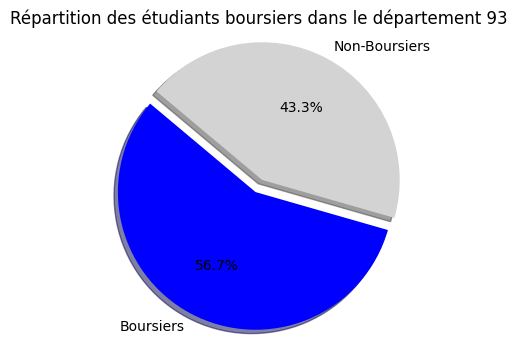

In [25]:
 

# Données pour le diagramme circulaire
labels = ['Boursiers', 'Non-Boursiers']
sizes = [nb_boursiers_93, nb_etudiants_93 - nb_boursiers_93]  # Nombre d'étudiants boursiers et non-boursiers dans le département 93
colors = ['blue', 'lightgrey']
explode = (0.1, 0)  # Faire ressortir la partie des boursiers

# Création du diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Répartition des étudiants boursiers dans le département 93')
plt.axis('equal')  # Assurer que le diagramme circulaire est dessiné en cercle

plt.show()



##### <span style="color:orange"> <strong>Corrélation entre le type de baccalauréat et la répartition départementale</strong></span>

##### Prédominance de baccalauréats technologiques STI2D  par rapport aux baccalauréats généraux peut indiquer plusieurs choses : <br>
La prédominance des baccalauréats technologiques STI2D par rapport aux baccalauréats généraux parmi les postulants en BTS Réseau et Télécommunication indique une orientation vers des compétences pratiques et techniques pertinentes pour ce domaine spécifique, ainsi qu'une adéquation entre le contenu des formations et les attentes du marché de l'emploi dans le domaine des technologies de l'information et de la communication.



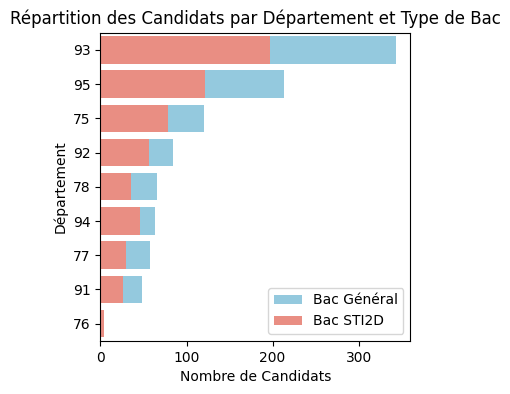

In [26]:
 


# Convertir la colonne en type chaîne
df2['Commune Etablissement origine - CodePostal 2022/2023'] = df2['Commune Etablissement origine - CodePostal 2022/2023'].astype(str)

# Liste des départements à inclure
departements_inclus = ['93', '94', '95', '77', '75', '78', '92', '91', '76']

# Filtrer les candidats des départements inclus
df_filtre = df2[df2['Commune Etablissement origine - CodePostal 2022/2023'].str[:2].isin(departements_inclus)]

# Filtrer les candidats avec un baccalauréat général (Générale) et ceux avec un baccalauréat STI2D
candidats_general = df_filtre[df_filtre['Série - Code'] == 'Générale']
candidats_sti2d = df_filtre[df_filtre['Série - Code'] == 'STI2D']

# Compter le nombre de candidats par département pour chaque groupe
counts_general = candidats_general['Commune Etablissement origine - CodePostal 2022/2023'].str[:2].value_counts()
counts_sti2d = candidats_sti2d['Commune Etablissement origine - CodePostal 2022/2023'].str[:2].value_counts()

# Créer un DataFrame pour les données
data = pd.DataFrame({
    'Département': counts_general.index,
    'Candidats Générale': counts_general.values,
    'Candidats STI2D': counts_sti2d.reindex(counts_general.index, fill_value=0).values  
    # Réindexer les valeurs STI2D pour correspondre à l'ordre des départements
})

# Visualisation
plt.figure(figsize=(4, 4))
sns.barplot(x='Candidats Générale', y='Département', data=data, color='skyblue', label='Bac Général')
sns.barplot(x='Candidats STI2D', y='Département', data=data, color='salmon', label='Bac STI2D')
plt.xlabel('Nombre de Candidats')
plt.ylabel('Département')
plt.title('Répartition des Candidats par Département et Type de Bac')
plt.legend()
plt.show()




##### <span style="color:orange"><strong>Corrélation entre le type de baccalauréat et le sexe</strong></span>

En examinant la répartition des types de baccalauréat par sexe, on peut mettre en lumière les domaines où il existe des disparités de genre en termes d'accès à certaines filières éducatives ou de choix de carrière. La prédominance masculine dans les filières générales et STI2D suggère que ces domaines sont perçus comme étant plus techniques ou masculins, ce qui conduit davantage d'hommes à y postuler. Cette observation met en lumière la nécessité de promouvoir une diversification des choix éducatifs pour garantir une représentation équilibrée des deux sexes.

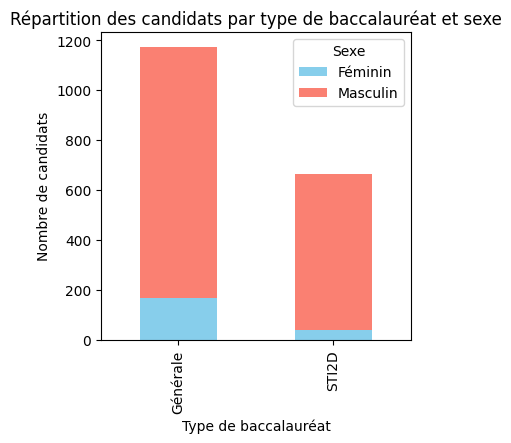

In [27]:
 

# Sélectionner les colonnes pertinentes pour l'analyse
donnees = df2[['Série - Code', 'Sexe']]

# Supprimer les lignes avec des valeurs manquantes
donnees = donnees.dropna()

# Transformation des données avec un tableau croisé dynamique
pivot_table = pd.crosstab(index=df2['Série - Code'], columns=df2['Sexe'])

 

# Normalisation des données
pivot_table_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Création du diagramme à barres empilées avec des couleurs
pivot_table.plot(kind='bar', stacked=True, figsize=(4, 4), color=['skyblue', 'salmon'])
plt.title('Répartition des candidats par type de baccalauréat et sexe')
plt.xlabel('Type de baccalauréat')
plt.ylabel('Nombre de candidats')
plt.legend(title='Sexe', loc='upper right')
plt.show()

 



## <span id="#Classement-pour-les-etudiants-de-bac-Génerale" style="color:orange">Classement pour les étudiants de bac Général</span>


<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a></li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale"><strong>Classement pour les etudiants de bac Génerale</strong></a>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques">Classement pour les etudiants de bac technologiques</<a></li>
    </ul>

Le classement des étudiants est établi en fonction de leur moyenne pondérée globale, calculée en prenant en compte les notes obtenues dans différentes matières, avec une pondération selon les coefficients attribués à chaque matière.

Pour chaque étudiant de la série générale ayant des notes en Mathématiques Spécialité, le script calcule la moyenne pondérée globale en tenant compte des moyennes de chaque matière, ainsi que des éventuels bonus accordés pour avoir suivi des modules facultatifs tels que les Mathématiques Expertes ou Complémentaires.

Les étudiants ayant obtenu les moyennes pondérées globales les plus élevées sont classés en tête du classement, tandis que ceux avec des moyennes plus basses apparaissent plus bas dans la liste.

Ce classement reflète la performance relative des étudiants en fonction de leurs résultats académiques dans les matières évaluées, en tenant compte à la fois des notes obtenues et des coefficients attribués à chaque matière.
 
### Matières prise en compte :
- Langue vivante A
- Langue vivante B
- Mathématiques Spécialité
- Mathématiques Expertes
- Mathématiques Complémentaires
- Sciences de l'ingénieur
- Numérique et Sciences Informatiques
- Français écrit
 

### Démarche suivie :

1. **Initialisation des Paramètres :**
   - Définition des coefficients de bonus pour les modules facultatifs.
   - Définition des matières et de leurs coefficients correspondants.

2. **Parcourir les Étudiants :**
   - Itération sur chaque étudiant dans le DataFrame.
   - Vérification si l'étudiant appartient à la série générale.

3. **Calcul des Moyennes :**
   - Calcul des moyennes pondérées pour chaque matière en fonction des coefficients.
   - Vérification de la participation éventuelle aux modules facultatifs pour l'ajout de bonus.
   - Extraction des notes des épreuves pour chaque matière spécifiée.

4. **Calcul des Moyennes Pondérées Globales :**
   - Si l'étudiant n'a pas de notes en Mathématiques Spécialité, il n'est pas classé.
   - Calcul de la moyenne pondérée globale en tenant compte des moyennes des trimestres (60%) et des épreuves (40%).

5. **Classement des Étudiants :**
   - Les étudiants ne possédant que les langues vivantes A et B ne sont pas classés.
   - Tri des moyennes des étudiants par ordre décroissant en fonction de la moyenne pondérée globale et du nombre de matières.

6. **Affichage des Résultats :**
   - Utilisation de la bibliothèque Tabulate pour afficher les moyennes des étudiants sous forme de tableau.


In [28]:
 
from tabulate import tabulate
 

# Définir les coefficients de bonus pour les modules facultatifs
coefficient_bonus_expertes = 0.5  # Bonus pour Mathématiques Expertes
coefficient_bonus_complementaires = 0.3  # Bonus pour Mathématiques Complémentaires

# Calculer la moyenne pour tous les étudiants de série générale
matieres_coefficients = {
    "Langue vivante A": ("Moyenne du Candidat en Langue vivante A pour trimestre", 1),
    "Langue vivante B": ("Moyenne du Candidat en Langue vivante B pour trimestre", 1),
    "Mathématiques Spécialité": ("Moyenne du Candidat en Mathématiques Spécialité pour trimestre", 2),
    "Mathématiques Expertes": ("Moyenne du Candidat en Mathématiques Expertes pour trimestre", 2),
    "Sciences de l'ingénieur": ("Moyenne du Candidat en Sciences de l'ingénieur pour trimestre", 2),
    "Mathématiques Complémentaires": ("Moyenne du Candidat en Mathématiques Complémentaires pour trimestre", 2),
    "Numérique et Sciences Informatiques": ("Moyenne du Candidat en Numérique et Sciences Informatiques pour trimestre", 2),
    "Français écrit": ("Moyenne du Candidat en Français pour trimestre", 1),
     
}
#focntion pour verifier si l'etudiant a fait les deux modules Mathématiques Expertes ou Mathématiques Complémentaires(ou les deux)
def a_suivi_module(etudiant, module):
    if module == "Mathématiques Expertes":
        return ((not pd.isnull(etudiant["Option facultative 1 Scolarité - Libellé 2020/2021"]) and
                "Mathématiques Expertes" in etudiant["Option facultative 1 Scolarité - Libellé 2020/2021"]) or
                (not pd.isnull(etudiant["Option facultative 2 Scolarité - Libellé 2020/2021"]) and
                "Mathématiques Expertes" in etudiant["Option facultative 2 Scolarité - Libellé 2020/2021"]))
    elif module == "Mathématiques Complémentaires":
        return ((not pd.isnull(etudiant["Option facultative 2 Scolarité - Libellé 2020/2021"]) and
                "Mathématiques Complémentaires" in etudiant["Option facultative 2 Scolarité - Libellé 2020/2021"])or
                (not pd.isnull(etudiant["Option facultative 1 Scolarité - Libellé 2020/2021"]) and
                "Mathématiques Expertes" in etudiant["Option facultative 1 Scolarité - Libellé 2020/2021"]))
    else:
        return False
     
   
# Fonction pour extraire les noms des épreuves et leurs notes pour les matières spécifiées
 
def extraire_epreuves_notes(etudiant, matiere):
    notes=[]
      
    for colonne in df2.columns:
        
        if colonne.startswith("Epreuve - Libelle") and isinstance(etudiant[colonne], str) and etudiant[colonne].startswith(matiere):
            note_colonne = df2.columns[df2.columns.get_loc(colonne) + 1]  # Accès à la colonne suivante
            note = etudiant[note_colonne]  # Récupération de la note dans la colonne suivante
             
            if pd.notnull(note) and isinstance(note, (int, float)):
                notes.append(note)
                     
    return notes

 

# Créer une liste pour stocker les moyennes des étudiants
moyennes_etudiants = []

# Boucle sur chaque ligne du DataFrame
for index, etudiant in df2.iterrows():
    # Vérifier si l'étudiant est de série générale
    if etudiant["Série - Code"] != "Générale":
        continue
   
    # Initialiser la somme des moyennes pondérées et la somme des coefficients pour les matières principales
    somme_moyennes_ponderees_trimestres= 0
    somme_coefficients1 = 0
    somme_coefficients2 = 0
    somme_moyennes_ponderees_epreuves=0
    nombre_matieres_langue=0
    nb_matiere=0
    nb_matiere_langue=0
   
    # Parcourir chaque matière et calculer sa moyenne pondérée pour cet étudiant
    for matiere, (prefixe, coefficient) in matieres_coefficients.items():
        # Vérifier si l'étudiant a suivi le module facultatif, si oui, ajouter le coefficient de bonus
        if "Mathématiques Expertes" in matiere:
            if a_suivi_module(etudiant, "Mathématiques Expertes"):
                coefficient += coefficient_bonus_expertes
            else:
                continue
        elif "Mathématiques Complémentaires" in matiere:
            if a_suivi_module(etudiant, "Mathématiques Complémentaires"):
                coefficient += coefficient_bonus_complementaires
            else:
                continue
       
       
        # Récupérer les colonnes pour chaque trimestre de la matière
        colonnes_matiere = [col for col in df2.columns if col.startswith(prefixe)]
         
        # Récupérer les valeurs des trimestres de terminale de la matière pour cet étudiant
        valeurs_trimestres_terminale = [etudiant[col] for col in colonnes_matiere if col.endswith("1") or col.endswith("2") or col.endswith("3")]
        
       
        # Filtrer les colonnes pour ne récupérer que les valeurs non nulles et numériques
        valeurs_trimestres_terminale_non_nulles = [valeur for valeur in valeurs_trimestres_terminale if pd.notnull(valeur) and isinstance(valeur, (int, float))]
              
        # Créez une variable pour stocker le statut de classement par défaut
        default_classement = "Non classé"
 
        if not valeurs_trimestres_terminale_non_nulles and matiere == "Mathématiques Spécialité":
            moyenne_ponderee_globale = default_classement
            print(f"L'étudiant {index + 1} n'a pas de notes en Mathématiques Spécialité et n'est pas classé.")
            break
        
        if valeurs_trimestres_terminale_non_nulles:
            # Incrémenter le nombre de matières
            nb_matiere += 1

            # Vérifier si la matière est une langue vivante A ou B
            if matiere == "Langue vivante A" or matiere == "Langue vivante B":
                nb_matiere_langue += 1
                
        # Calculer la moyenne des valeurs non nulles des trimestres de terminale de la matière pour cet étudiant
        if valeurs_trimestres_terminale_non_nulles:
            moyenne_matiere_etudiant = sum(valeurs_trimestres_terminale_non_nulles) / len(valeurs_trimestres_terminale_non_nulles)
         
            # Ajouter la moyenne pondérée de cette matière à la somme des moyennes pondérées
            somme_moyennes_ponderees_trimestres += moyenne_matiere_etudiant * coefficient
            somme_coefficients1 += coefficient
           
    # Calculer la moyenne des épreuves avec les coefficients des matières principales
        epreuves_notes = extraire_epreuves_notes(etudiant,matiere)
        if epreuves_notes:
            somme_notes_epreuves = sum(epreuves_notes)
            moyenne_epreuves = somme_notes_epreuves / len(epreuves_notes)
            # Ajouter la moyenne pondérée des épreuves à la somme des moyennes pondérées des epreuves
            somme_moyennes_ponderees_epreuves += moyenne_epreuves * coefficient
            somme_coefficients2 += coefficient
            
     # Vérifier si l'étudiant n'a que les langues vivantes A et B comme matières
    if nb_matiere == nb_matiere_langue :
        # Afficher que l'étudiant n'est pas classé
        print(f"L'étudiant numéro {index} n'est pas classé car il n'a que les langues vivantes A et B.")
        # Passer à l'étudiant suivant
        continue
       
    moyenne_ponderes_trimestres=somme_moyennes_ponderees_trimestres / somme_coefficients1
    moyenne_ponderes_epreuves=somme_moyennes_ponderees_epreuves /somme_coefficients2
    # Calculer la moyenne pondérée globale pour cet étudiant
     
        
        # Calculer la moyenne pondérée globale pour cet étudiant
    if somme_coefficients1 != 0:  # Vérifier si la somme des coefficients des trimestres est non nulle
        if somme_coefficients2 != 0:  # Vérifier si la somme des coefficients des épreuves est non nulle
            # Calculer la moyenne pondérée globale en se basant à la fois sur les moyennes des trimestres et des épreuves
            moyenne_ponderee_globale = moyenne_ponderes_trimestres * 0.6 + moyenne_ponderes_epreuves * 0.4
        else:
            # Calculer la moyenne pondérée globale en se basant uniquement sur les moyennes des trimestres
            moyenne_ponderee_globale = moyenne_ponderes_trimestres 
    else:
        moyenne_ponderee_globale = None

   
    # Ajouter l'ID de l'étudiant et sa moyenne pondérée globale à la liste
    moyennes_etudiants.append((index + 1, moyenne_ponderee_globale ))

# Trier les moyennes des étudiants par ordre décroissant
moyennes_etudiants.sort(key=lambda x: x[1], reverse=True)

# Initialisation du compteur de classement
classement = 1

# Ajout de la colonne de classement au tableau trié
moyennes_etudiants_with_classement = []
for etudiant in moyennes_etudiants:
    moyennes_etudiants_with_classement.append((etudiant[0], etudiant[1], classement))
    classement += 1

# Afficher les moyennes des étudiants sous forme de tableau
headers = ["ID Étudiant", "Moyenne Pondérée Globale", "Classement"]
table = tabulate(moyennes_etudiants_with_classement, headers=headers, tablefmt="fancy_grid")
print(table)  # Imprime le tableau directement dans la sortie Jupyter


L'étudiant 50 n'a pas de notes en Mathématiques Spécialité et n'est pas classé.
L'étudiant numéro 49 n'est pas classé car il n'a que les langues vivantes A et B.
L'étudiant 51 n'a pas de notes en Mathématiques Spécialité et n'est pas classé.
L'étudiant numéro 50 n'est pas classé car il n'a que les langues vivantes A et B.
L'étudiant 58 n'a pas de notes en Mathématiques Spécialité et n'est pas classé.
L'étudiant numéro 57 n'est pas classé car il n'a que les langues vivantes A et B.
L'étudiant 60 n'a pas de notes en Mathématiques Spécialité et n'est pas classé.
L'étudiant numéro 59 n'est pas classé car il n'a que les langues vivantes A et B.
L'étudiant 66 n'a pas de notes en Mathématiques Spécialité et n'est pas classé.
L'étudiant numéro 65 n'est pas classé car il n'a que les langues vivantes A et B.
L'étudiant 158 n'a pas de notes en Mathématiques Spécialité et n'est pas classé.
L'étudiant numéro 157 n'est pas classé car il n'a que les langues vivantes A et B.
L'étudiant 161 n'a pas de 


## <span id="Classement-pour-les-etudiants-bac-technologiques" style="color:orange">Classement pour les etudiants de bac technologiques</span>

<ul>
        <li><a href="#informations-sur-les-donnees">Informations sur les données</a></li>
        <li><a href="#traitements-effectues-sur-les-donnees">Traitements effectués sur les données</a></li>
        <li><a href="#Choix-des-départements-mis-en-avant-dans-nos-visualisations">Choix des départements mis en avant dans nos visualisations</a></li>
        <li><a href="#Répartition-des-candidats">Répartition des candidats</a></li>
        <li><a href="#Statistiques-sur-les-données">Statistiques sur les données</a>
        <li><a href="#différentes-corrélations">Les différentes corrélations</a></li>
        <li><a href="#Classement-pour-les-etudiants-de-bac-Génerale">Classement pour les etudiants de bac Génerale<a></li>
        <li><a href="#Classement-pour-les-etudiants-bac-technologiques"><strong>Classement pour les etudiants de bac technologiques</strong><a></li>
</ul>

### Matières prises en compte :
- Langue vivante A
- Langue vivante B
- Mathématiques
- Systèmes d'information et numérique
- Physique-Chimie et Mathématiques
- Français écrit


### Démarche suivie :

1. **Initialisation des Paramètres :**
   - Définition des matières et de leurs coefficients correspondants pour les étudiants de série technologique.

2. **Parcourir les Étudiants :**
   - Itération sur chaque ligne du DataFrame pour récupérer les données des étudiants.

3. **Calcul des Moyennes :**
   - Pour chaque matière, calcul des moyennes pondérées en fonction des coefficients.
   - Extraction des notes des épreuves pour chaque matière spécifiée.

4. **Calcul des Moyennes Pondérées Globales :**
   - Calcul de la moyenne pondérée globale en tenant compte des moyennes des trimestres (60%) et des épreuves (40%).
   - Vérification si l'étudiant n'a pas de notes en Mathématiques et affichage d'un message approprié dans ce cas.

5. **Classement des Étudiants :**
   - Les étudiants ne possédant que les langues vivantes A et B ne sont pas classés.
   - Tri des moyennes des étudiants par ordre décroissant en fonction de la moyenne pondérée globale et du numéro d'étudiant.

6. **Affichage des Résultats :**
   - Utilisation de la bibliothèque Tabulate pour afficher les moyennes des étudiants sous forme de tableau.


In [29]:
 
from tabulate import tabulate

# Calculer la moyenne pour tous les étudiants de série technologique
matieres_coefficients = {
    "Langue vivante A": ("Moyenne du Candidat en Langue vivante A pour trimestre", 1),
    "Langue vivante B": ("Moyenne du Candidat en Langue vivante B pour trimestre", 1),
    "Mathématiques": ("Moyenne du Candidat en Mathématiques pour trimestre", 2),
    "Systèmes d'information et numérique": ("Moyenne du Candidat en Systemes d''information et numerique pour trimestre", 2),
    "Physique-Chimie et Mathématiques": ("Matière - Libellé en Physique-Chimie et Mathématiques pour trimestre", 2),
    "Français écrit": ("Moyenne du Candidat en Français pour trimestre", 1),
 
}

 
# Fonction pour extraire les noms des épreuves et leurs notes pour les matières spécifiées
def extraire_epreuves_notes(etudiant, matiere):
    notes=[] 
    for colonne in df2.columns:
        if colonne.startswith("Epreuve - Libelle") and isinstance(etudiant[colonne], str) and etudiant[colonne].startswith(matiere):
            note_colonne = df2.columns[df2.columns.get_loc(colonne) + 1]  # Accès à la colonne suivante
            note = etudiant[note_colonne]  # Récupération de la note dans la colonne suivante
             
            if pd.notnull(note) and isinstance(note, (int, float)):
                notes.append(note)                
    return notes

# Créer une liste pour stocker les moyennes des étudiants
moyennes_etudiants = []

# Boucle sur chaque ligne du DataFrame
for index, etudiant in df2.iterrows():
    # Vérifier si l'étudiant est de série STI2D
    if etudiant["Série - Code"] != "STI2D":
        continue
   
    # Initialiser la somme des moyennes pondérées et la somme des coefficients pour les matières principales
    somme_moyennes_ponderees_trimestres= 0
    somme_coefficients1 = 0
    somme_coefficients2 = 0
    somme_moyennes_ponderees_epreuves=0
    nombre_matieres_langue=0
    nb_matiere=0
    nb_matiere_langue=0
    
   
    # Parcourir chaque matière et calculer sa moyenne pondérée pour cet étudiant
    for matiere, (prefixe, coefficient) in matieres_coefficients.items():
        
        # Récupérer les colonnes pour chaque trimestre de la matière
        colonnes_matiere = [col for col in df2.columns if col.startswith(prefixe)]
         
        # Récupérer les valeurs des trimestres de terminale de la matière pour cet étudiant
        valeurs_trimestres_terminale = [etudiant[col] for col in colonnes_matiere if col.endswith("1") or col.endswith("2") or col.endswith("3")]
        
       
        # Filtrer les colonnes pour ne récupérer que les valeurs non nulles et numériques
        valeurs_trimestres_terminale_non_nulles = [valeur for valeur in valeurs_trimestres_terminale if pd.notnull(valeur) and isinstance(valeur, (int, float))]
             
        # Créez une variable pour stocker le statut de classement par défaut
        default_classement = "Non classé"

        
        if not valeurs_trimestres_terminale_non_nulles and matiere == "Mathématiques":
            moyenne_ponderee_globale = default_classement
            print(f"L'étudiant {index + 1} n'a pas de notes en Mathématiques et n'est pas classé.")
            break
        
        if valeurs_trimestres_terminale_non_nulles:
            # Incrémenter le nombre de matières
            nb_matiere += 1

            # Vérifier si la matière est une langue vivante A ou B
            if matiere == "Langue vivante A" or matiere == "Langue vivante B":
                nb_matiere_langue += 1
                
        # Calculer la moyenne des valeurs non nulles des trimestres de terminale de la matière pour cet étudiant
        if valeurs_trimestres_terminale_non_nulles:
            moyenne_matiere_etudiant = sum(valeurs_trimestres_terminale_non_nulles) / len(valeurs_trimestres_terminale_non_nulles)
            somme_moyennes_ponderees_trimestres += moyenne_matiere_etudiant * coefficient
            somme_coefficients1 += coefficient
            
   
    # Calculer la moyenne des épreuves avec les coefficients des matières principales
        epreuves_notes = extraire_epreuves_notes(etudiant,matiere)
         
    
        if epreuves_notes:
            somme_notes_epreuves = sum(epreuves_notes)
            moyenne_epreuves = somme_notes_epreuves / len(epreuves_notes)
            somme_moyennes_ponderees_epreuves += moyenne_epreuves * coefficient
            somme_coefficients2 += coefficient
            
     # Vérifier si l'étudiant n'a que les langues vivantes A et B comme matières
    if nb_matiere == nb_matiere_langue :
        # Afficher que l'étudiant n'est pas classé
        print(f"L'étudiant numéro {index} n'est pas classé car il n'a que les langues vivantes A et B.")
        # Passer à l'étudiant suivant
        continue
    
    moyenne_ponderes_trimestres=somme_moyennes_ponderees_trimestres / somme_coefficients1
    if somme_coefficients2!=0:
        moyenne_ponderes_epreuves=somme_moyennes_ponderees_epreuves /somme_coefficients2
    # Calculer la moyenne pondérée globale pour cet étudiant
     
        
        # Calculer la moyenne pondérée globale pour cet étudiant
    if somme_coefficients1 != 0:  # Vérifier si la somme des coefficients des trimestres est non nulle
        if somme_coefficients2 != 0:  # Vérifier si la somme des coefficients des épreuves est non nulle
            # Calculer la moyenne pondérée globale en se basant à la fois sur les moyennes des trimestres et des épreuves
            moyenne_ponderee_globale = moyenne_ponderes_trimestres * 0.6 + moyenne_ponderes_epreuves * 0.4
        else:
            # Calculer la moyenne pondérée globale en se basant uniquement sur les moyennes des trimestres
            moyenne_ponderee_globale = moyenne_ponderes_trimestres 
    else:
        moyenne_ponderee_globale = None
    
    
    
   
    # Ajouter l'ID de l'étudiant et sa moyenne pondérée globale à la liste
    moyennes_etudiants.append((index + 1, moyenne_ponderee_globale,0))

# Trier les moyennes des étudiants par ordre décroissant
moyennes_etudiants.sort(key=lambda x: x[1], reverse=True)

# Initialisation du compteur de classement
classement = 1

# Ajout de la colonne de classement au tableau trié
moyennes_etudiants_with_classement = []
for etudiant in moyennes_etudiants:
    moyennes_etudiants_with_classement.append((etudiant[0], etudiant[1], classement))
    classement += 1

# Afficher les moyennes des étudiants sous forme de tableau
headers = ["ID Étudiant", "Moyenne Pondérée Globale", "Classement"]
table = tabulate(moyennes_etudiants_with_classement, headers=headers, tablefmt="fancy_grid")
print(table)  # Imprime le tableau directement dans la sortie Jupyter




L'étudiant 244 n'a pas de notes en Mathématiques et n'est pas classé.
L'étudiant numéro 243 n'est pas classé car il n'a que les langues vivantes A et B.
╒═══════════════╤════════════════════════════╤══════════════╕
│   ID Étudiant │   Moyenne Pondérée Globale │   Classement │
╞═══════════════╪════════════════════════════╪══════════════╡
│          1363 │                   17.586   │            1 │
├───────────────┼────────────────────────────┼──────────────┤
│           790 │                   17.487   │            2 │
├───────────────┼────────────────────────────┼──────────────┤
│          1448 │                   17.1856  │            3 │
├───────────────┼────────────────────────────┼──────────────┤
│          1294 │                   16.8338  │            4 │
├───────────────┼────────────────────────────┼──────────────┤
│          1428 │                   16.5434  │            5 │
├───────────────┼────────────────────────────┼──────────────┤
│           712 │                   16.37